## Objective: 
To build a machine model, using historical banking data that will help the bank employees to determine appropriate candidature for the loan approval.

## Data Dictionary

Loan_ID: Unique Loan ID issued on every loan for a applicant, dtype: Object.

Gender: Gender of a applicant whether male or female, dtype: string.

Married: Martial status of a applicant i.e., Yes for married and NO for single, dtype: string.

Dependents: Number of individuals who are financially dependent on applicant, dtype: integer.

Education: Highest Education of applicant i.e, Bachelor, Post Graduation etc, dtype: string.

Self_employed: Whether the applicant is self employed or not i.e, Yes for self employed or else NO, dtype: string.

ApplicantIncome: Income of the applicant, dtype: integer.

CoApplicantIncome: Applicant have to put one nominee name that is called CoApplicant. So, it is column releated to coapplicant income, dtype: Integer.

Loan Amount: Amount of loan applicant wants to issue from the bank.

Loan_Amount_Term: The amount of time the lender gives you to repay your whole loan, dtype: float

Credit_History: It tells about the credit done in the past by the applicant, dtype: Integer.

Property_Area: This tells about the applicant property is in which area i.e., Rural or Urban, dtype: String.

Loan_status: It is a target variable column which tells about whether the applicant application for loan approval is passed or not, dtype: String.

In [1]:
# Importing necessary libraries for data analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Importing dataset 

path = "C:/Users/srini/Skillslash/Live Project 1/Consumer creditworthiness train data.xlsx"
loan_data = pd.read_excel(path)

In [3]:
# Overview of Dataset

loan_data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,294853,Male,No,0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y
1,162883,Male,Yes,1,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N
2,620668,Male,Yes,0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y
3,295747,Male,Yes,0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y
4,133390,Male,No,0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y
5,922093,Male,Yes,2,Graduate,Yes,1218825,944100.0,534000,360.0,1.0,Urban,Y
6,804795,Male,Yes,0,Not Graduate,No,524925,341100.0,190000,360.0,1.0,Urban,Y
7,538051,Male,Yes,3+,Graduate,No,683100,563400.0,316000,360.0,0.0,Semiurban,N
8,617715,Male,Yes,2,Graduate,No,901350,343350.0,336000,360.0,1.0,Urban,Y
9,696993,Male,Yes,1,Graduate,No,2889225,2467800.0,698000,360.0,1.0,Semiurban,N


In [4]:
# Checking General Information of loan data

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            521 non-null    int64  
 1   Gender             511 non-null    object 
 2   Married            518 non-null    object 
 3   Dependents         508 non-null    object 
 4   Education          521 non-null    object 
 5   Self_Employed      494 non-null    object 
 6   ApplicantIncome    521 non-null    int64  
 7   CoapplicantIncome  521 non-null    float64
 8   LoanAmount         521 non-null    int64  
 9   Loan_Amount_Term   507 non-null    float64
 10  Credit_History     478 non-null    float64
 11  Property_Area      521 non-null    object 
 12  Loan_Status        521 non-null    object 
dtypes: float64(3), int64(3), object(7)
memory usage: 53.0+ KB


### Observations

1. There are total of 521 records and 13 attributes
2. 7 of 13 attributes are object type
3. There are few null values across many attributes which shall be explored in the following stages

In [5]:
# Checking for the percentage of null values in the loan data

'''
In the below code snippet, total null values of respective attributes are summed up and these values
are divided with the total number of records in the Loan data. Loan ID attribute is considered for 
determining total number of records since
1. Loan ID doesn't contain null values
2. Loan ID is the unique identification number which is the primary key for this dataset
'''

round((loan_data.isnull().sum()/loan_data["Loan_ID"].count())*100,2)



Loan_ID              0.00
Gender               1.92
Married              0.58
Dependents           2.50
Education            0.00
Self_Employed        5.18
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     2.69
Credit_History       8.25
Property_Area        0.00
Loan_Status          0.00
dtype: float64

### Observations

1. 6 attributes contain null values
2. Credit_History column has highest percentage of null values at 8.25% follwed by self_Employed and Loan_Amount_Terms columns
2. 7 out of 13 attributes does not contain any null values

# Exploratory Data Analysis

## Loan ID

Null Hypothesis: Loan ID will have impact on dependent variable for determining loan eligibility

Alternate Hypothesis: Loan ID will have not have impact on dependent variable for determining loan eligibility

In [6]:
# Checking for the unique values count of the column

print("Total Number of Unique Values are:",loan_data["Loan_ID"].nunique())

Total Number of Unique Values are: 521


There are as many number of unique values as total number of records. Therefore we can conclude that there are no duplicates in our dataset

Further, It is pertinent to note that column Loan_ID indicates the total number of applicants applied for loan. Therefore this feature will not have any impact to decide on loan eligibilty.

As a result of above explaination we can reject null hypothesis.

## Gender

Null Hypothesis: Gender will have impact on the loan eligibility

Alternate Hypothesis : Gender will not have any impact for concluding loan eligibility

In [7]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Gender"].nunique())

print("Unique Values are:", loan_data["Gender"].unique())

print("Total Number of Null Records are:", loan_data["Gender"].isnull().sum())

Total Number of Unique Values are: 2
Unique Values are: ['Male' 'Female' nan]
Total Number of Null Records are: 10


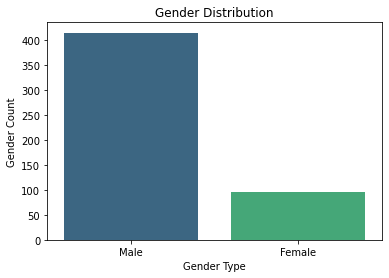

In [8]:
# Univariate Analysis 

sns.countplot(data = loan_data, x = "Gender", palette="viridis")
plt.title("Gender Distribution")
plt.xlabel("Gender Type")
plt.ylabel("Gender Count")
plt.show()

Majority of loan applicants are male

Total number of Male applicants are: 415
Total number of Female applicants are: 96


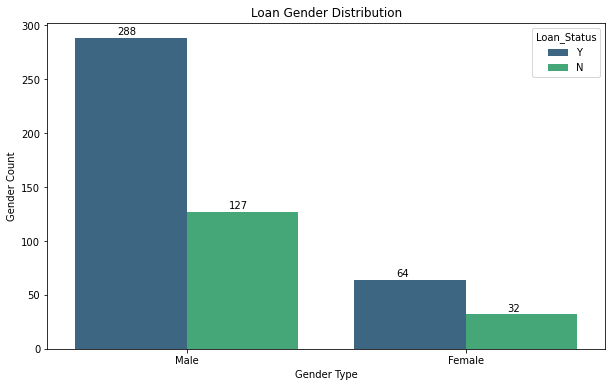

In [9]:
# Bivariate analysis - Gender on loan eligibility


female_app = loan_data["Gender"].tolist().count("Female")
male_app = loan_data["Gender"].tolist().count("Male")

print("Total number of Male applicants are:", male_app)
print("Total number of Female applicants are:", female_app)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Gender", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Loan Gender Distribution")
plt.xlabel("Gender Type")
plt.ylabel("Gender Count")
plt.show()

## Observations

Above analysis clearly shows that there are total 511 (Male = 415 & Female = 96) non null loan applicants.

Out of 415 Male applicants, 
    288 applicants loan eligibility is labelled as Yes
    127 applicants loan eligibility is labelled as No
    
    Therefore we can conclude around 69% of Male applicants are eligible for loans
    
Out of 96 Female applicants, 
    64 applicants loan eligibility is labelled as Yes
    32 applicants loan eligibility is labelled as No
    
    Therefore we can conclude around 67% of Female applicants are eligible for loans
    
From above analysis it is evident that almost similar proportion of male and female applicants are eligible for loans. Therefore we cannot consider column "Gender" to decide loan eligibility. Subsequently, Null hypothesis can be rejected.


### Married

Null Hypothesis: Married column will have impact on target variable i.e. Loan eligibility

Alternate Hypothesis: Married column shall not have impact on loan eligibility

In [10]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Married"].nunique())

print("Unique Values are:", loan_data["Married"].unique())

print("Total Number of Null Records are:", loan_data["Married"].isnull().sum())

Total Number of Unique Values are: 2
Unique Values are: ['No' 'Yes' nan]
Total Number of Null Records are: 3


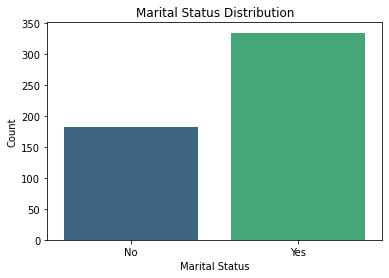

In [11]:
# Univariate Analysis 

sns.countplot(data = loan_data, x = "Married", palette="viridis")
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

Most of the loan applicants are married.

Total number of Married Applicants are: 335
Total number of Unmarried Applicants are: 183


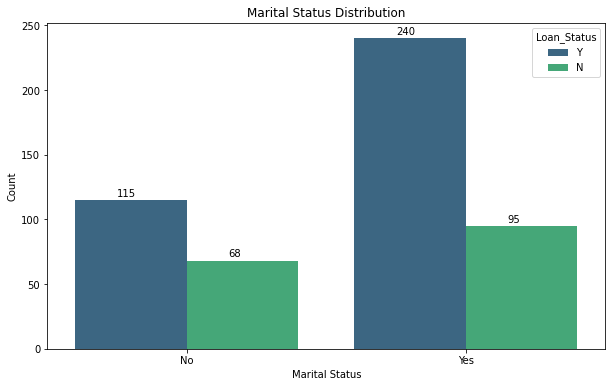

In [12]:
# Bivariate analysis - Mariatal Status on loan eligibility


marital_y = loan_data["Married"].tolist().count("Yes")
marital_n = loan_data["Married"].tolist().count("No")

print("Total number of Married Applicants are:", marital_y)
print("Total number of Unmarried Applicants are:", marital_n)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Married", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

### Observations

Above analysis clearly shows that there are total 518 (Married = 335 & Unmarried = 183) non null loan applicants.

Out of 335 Married applicants, 240 applicants are eligible for loans (labelled as 'Yes') and 95 applicants are not eligible for loan (labelled as 'No')

    Therefore we can conclude around 72% of Married applicants are eligible for loans

Out of 183 Unmarried applicants, 115 applicants are eligible for loan (labelled as 'Yes') and 68 applicants are not eligible for loan eligibility (labelled as 'No')

    Therefore we can conclude around 63% of Unmarried applicants are eligible for loans

From above analysis it is evident that loan eligibility of either married or unmarried applicants lies in the range of 63% to 73% which is almost similar proportions of applicants eligible for loans. Therefore we cannot consider column "Married" to decide loan eligibility. Subsequently, Null hypothesis can be rejected.

## Dependents

Null Hypothesis: Dependents will impact loan eligibility

Alternate Hypothesis : Dependents will not affect loan eligibility

In [13]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Dependents"].nunique())

print("Unique Values are:", loan_data["Dependents"].unique())

print("Total Number of Null Records are:", loan_data["Dependents"].isnull().sum())

Total Number of Unique Values are: 4
Unique Values are: [0 1 2 '3+' nan]
Total Number of Null Records are: 13


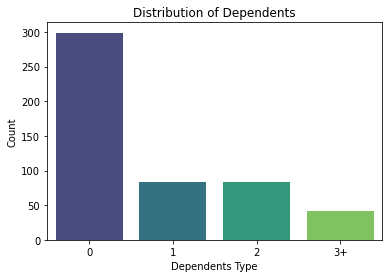

In [14]:
# Univariate Analysis

sns.countplot(data = loan_data, x = "Dependents", palette = "viridis")
plt.title("Distribution of Dependents")
plt.xlabel("Dependents Type")
plt.ylabel("Count")
plt.show()

Majority of loan applicants dont have dependents

Total number of No Dependents Applicants are: 299
Total number of One Dependent Applicants are: 84
Total number of Two Dependent Applicants are: 84
Total number of Three or more Dependent Applicants are: 41


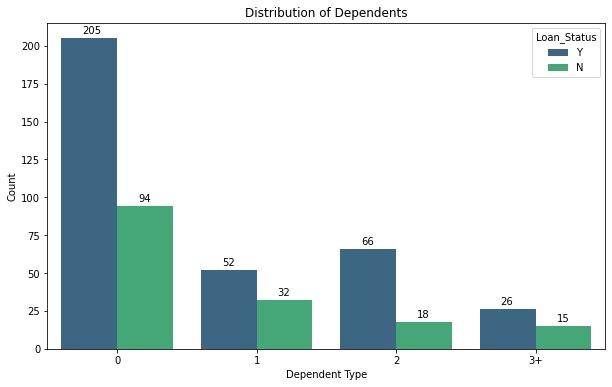

In [15]:
# Bivariate analysis - Dependents on loan eligibility


dep_0 = loan_data["Dependents"].tolist().count(0)
dep_1 = loan_data["Dependents"].tolist().count(1)
dep_2 = loan_data["Dependents"].tolist().count(2)
dep_3 = loan_data["Dependents"].tolist().count("3+")

print("Total number of No Dependents Applicants are:", dep_0)
print("Total number of One Dependent Applicants are:", dep_1)
print("Total number of Two Dependent Applicants are:", dep_2)
print("Total number of Three or more Dependent Applicants are:", dep_3)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Dependents", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Distribution of Dependents")
plt.xlabel("Dependent Type")
plt.ylabel("Count")
plt.show()

Observations

Above analysis clearly shows that there are total 508 (299 + 84 + 84 + 41) non null loan applicants.

There is a combination of Integer and String Values in the feature

Follwing below indicates the percentage of loan eligibility based on the number of dependents

Zero Dependents = 69 %
One Dependent = 62 %
Two Dependents = 79 %
Three or More Dependents = 63 %

From above analysis it is evident that loan eligibility is fluctuating between range 60 % to 80 %. Applicants with two number of dependents being the highest among loan approvals. Further analysis needs to be carried out before rejecting or accepting the null hypothesis

In [16]:
# Additional Feature Creation as Total_Income which is summation of Applicant & Coapplicant's Income

'''
To comprehend dependents feature's impact on loan eligibility, a new feature called total income is created. 
The sames might help to understand the relationship between dependents, income and loan eligibility. 

Apparently, If applicant's number of dependents are more and posses higher total_income, then probability of
loan eligibility is on the higher side and vice-versa.
'''

loan_data["Total_Income"] = loan_data["ApplicantIncome"] + loan_data["CoapplicantIncome"]

In [17]:
# Overview of new column Total_Income

loan_data["Total_Income"].head(7)

0    1316025.0
1    1370475.0
2     675000.0
3    1111725.0
4    1350000.0
5    2162925.0
6     866025.0
Name: Total_Income, dtype: float64

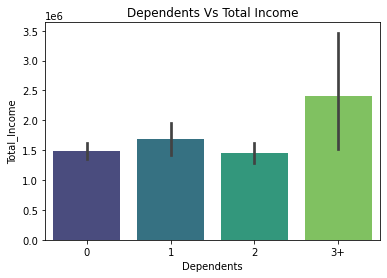

In [18]:
# Bivariate analysis of dependents on total income

sns.barplot(data = loan_data, x="Dependents", y="Total_Income", palette= "viridis")
plt.title("Dependents Vs Total Income")
plt.show()

### Observations

On further analysis, it is clear that average income for three or more dependents are high, and the income remains similar for all other types.

Since the average income is almost similar for 0, 1 & 2 dependents, it fails to explain the variability of dependents vs loan eligibility. 

Therefore we can conclude that, dependents feature does not influence loan eligibility decision. Further, we can reject null hypothesis

## Education

Null Hypothesis : Education Status will impact loan eligibility

Alternate Hypothesis : Education status will not impact loan eligibility

In [19]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Education"].nunique())

print("Unique Values are:", loan_data["Education"].unique())

print("Total Number of Null Records are:", loan_data["Education"].isnull().sum())

Total Number of Unique Values are: 2
Unique Values are: ['Graduate' 'Not Graduate']
Total Number of Null Records are: 0


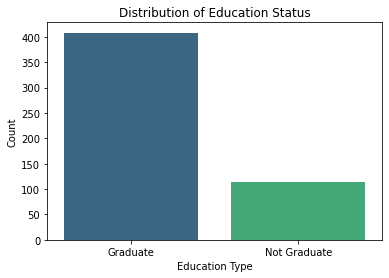

In [20]:
# Univariate Analysis

sns.countplot(data = loan_data, x = "Education", palette = "viridis")
plt.title("Distribution of Education Status")
plt.xlabel("Education Type")
plt.ylabel("Count")
plt.show()

There are higher proportion of graduates than non-graduates

Total number of Graduate Applicants are: 408
Total number of Non Graduate Applicants are: 113


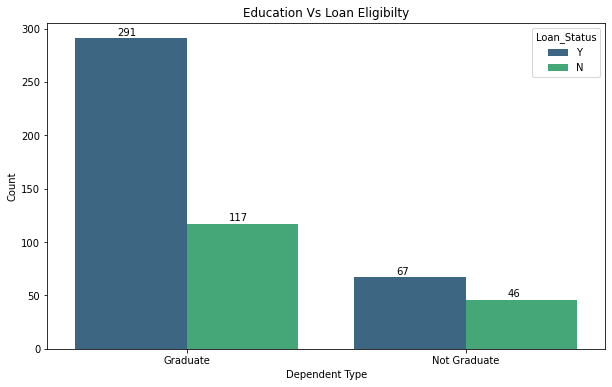

In [21]:
# Bivariate analysis - Education on loan eligibility


edu_g = loan_data["Education"].tolist().count("Graduate")
edu_ng = loan_data["Education"].tolist().count("Not Graduate")

print("Total number of Graduate Applicants are:", edu_g)
print("Total number of Non Graduate Applicants are:", edu_ng)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Education", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Education Vs Loan Eligibilty")
plt.xlabel("Dependent Type")
plt.ylabel("Count")
plt.show()

### Observations

Above analysis clearly shows that there are total 521 (408 + 113) non null loan applicants.

Out of 408 Graduated applicants, 291 applicants are eligible for loan (labelled as 'Yes') and 117 applicants are not eligible for loan (labelled as 'No')

    Therefore we can conclude around 72% of Graduated applicants are eligible for loans
    
Out of 113 Non Graduated applicants, 67 applicants are eligible for loan (labelled as 'Yes') and 46 applicants are not eligible for loan eligibility (labelled as 'No')

    Therefore we can conclude around 59% of Non Graduated applicants are eligible for loans
    
From above analysis it is evident that loan eligibility of graduates are much higher than the non graduates. Therefore we can consider column "Education" might impact loan eligibility. Subsequently, Null hypothesis cannot be rejected.

## Self Employed

Null Hypothesis : Employment Status will impact loan eligibility

Alternate Hypothesis : Employment status will not impact loan eligibility

In [22]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Self_Employed"].nunique())

print("Unique Values are:", loan_data["Self_Employed"].unique())

print("Total Number of Null Records are:", loan_data["Self_Employed"].isnull().sum())

Total Number of Unique Values are: 2
Unique Values are: ['No' 'Yes' nan]
Total Number of Null Records are: 27


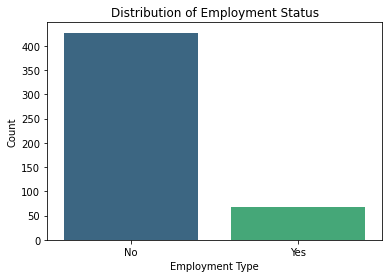

In [23]:
# Univariate Analysis

sns.countplot(data = loan_data, x = "Self_Employed", palette = "viridis")
plt.title("Distribution of Employment Status")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

Most of the loan applicants are not self employed

Total number of Self Employed Applicants are: 67
Total number of Non Self Employed Applicants are: 427


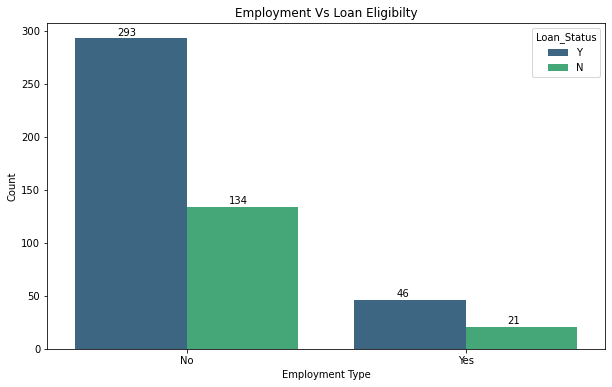

In [24]:
# Bivariate analysis - Self_Employed on loan eligibility


emp_y = loan_data["Self_Employed"].tolist().count("Yes")
emp_n = loan_data["Self_Employed"].tolist().count("No")

print("Total number of Self Employed Applicants are:", emp_y)
print("Total number of Non Self Employed Applicants are:", emp_n)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Self_Employed", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Employment Vs Loan Eligibilty")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.show()

### Observations

Above analysis clearly shows that there are total 494 (Non Self Employed = 427 & Self Employed = 67) non null loan applicants.

Out of 427 non self employed applicants, 292 applicants eligible for loans (labelled as 'Yes') and 134 applicants are not eligible for loan (labelled as 'No')

    Therefore we can conclude around 68% of Non Self Employed applicants are eligible for loans
    
Out of 67 self employed applicants, 46 applicants are eligible for loan (labelled as 'Yes') and 21 applicants are not eligible for loan eligibility (labelled as 'No')

    Therefore we can conclude around 68% of Self Employed applicants are eligible for loans
   
From above analysis it is evident that loan eligibility of either Self Employed or Non Self Employed applicants is around 68% which is similar proportions of applicants eligible for loans. Therefore we cannot consider column "Self_Employed" to decide loan eligibility. Subsequently, Null hypothesis can be rejected.

## Property Area

Null Hypothesis : Property Area will impact loan eligibility

Alternate Hypothesis : Property Area will not impact loan eligibility

In [25]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Property_Area"].nunique())

print("Unique Values are:", loan_data["Property_Area"].unique())

print("Total Number of Null Records are:", loan_data["Property_Area"].isnull().sum())

Total Number of Unique Values are: 3
Unique Values are: ['Urban' 'Rural' 'Semiurban']
Total Number of Null Records are: 0


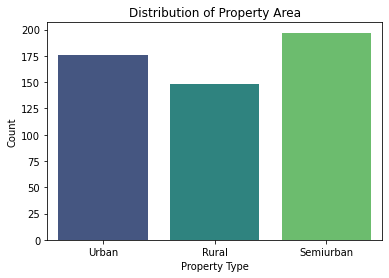

In [26]:
# Univariate Analysis

sns.countplot(data = loan_data, x = "Property_Area", palette = "viridis")
plt.title("Distribution of Property Area")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.show()

There are similar distributions of property area across the loan applicants

Total number of Urban Applicants are: 176
Total number of Rural Applicants are: 148
Total number of Semiurban Applicants are: 197


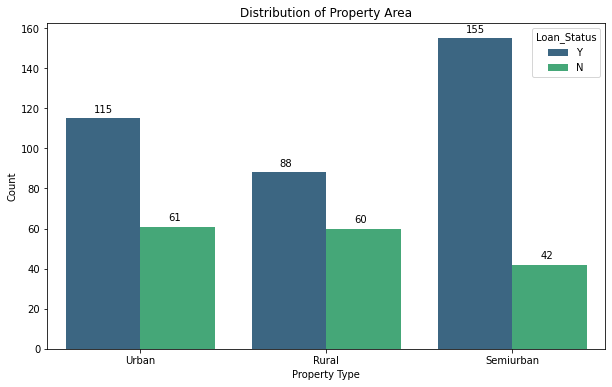

In [27]:
# Bivariate analysis - Property Area on loan eligibility


pa_u = loan_data["Property_Area"].tolist().count("Urban")
pa_r = loan_data["Property_Area"].tolist().count("Rural")
pa_su = loan_data["Property_Area"].tolist().count("Semiurban")

print("Total number of Urban Applicants are:", pa_u)
print("Total number of Rural Applicants are:", pa_r)
print("Total number of Semiurban Applicants are:", pa_su)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Property_Area", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Distribution of Property Area")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.show()

### Observations

Above analysis clearly shows that there are total 521 (Urban 176 + Rural 148 + Semiurban 197) non null loan applicants.

Out of 176 Urban applicants, 115 applicants are eligible for loan (labelled as 'Yes') and 61 applicants are not eligible for loan (labelled as 'No')

    Therefore we can conclude around 65% of Urban applicants are eligible for loans
    
Out of 148 Rural applicants, 88 applicants are eligible for loan (labelled as 'Yes') and 60 applicants are not eligible for loan eligibility (labelled as 'No')

    Therefore we can conclude around 59% of Non Graduated applicants are eligible for loans

Out of 197 Semiurban applicants, 155 applicants are eligible for loan (labelled as 'Yes') and 42 applicants are not eligible for loan eligibility (labelled as 'No')

    Therefore we can conclude around 79% of Non Graduated applicants are eligible for loans
    
From above analysis it is evident that loan eligibility of depends on Property Area. Therefore we can consider column "Property_Area" might impact loan eligibility. Subsequently, Null hypothesis cannot be rejected.

## Credit History

Null Hypothesis : Credit History will impact loan eligibility

Alternate Hypothesis : Credit history will not impact loan eligibility

In [28]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Credit_History"].nunique())

print("Unique Values are:", loan_data["Credit_History"].unique())

print("Total Number of Null Records are:", loan_data["Credit_History"].isnull().sum())

Total Number of Unique Values are: 2
Unique Values are: [ 1.  0. nan]
Total Number of Null Records are: 43


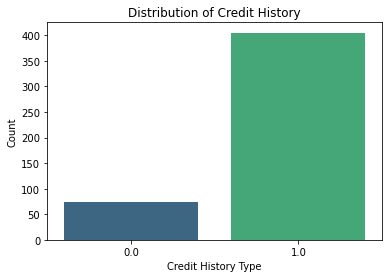

In [29]:
# Univariate Analysis

sns.countplot(data = loan_data, x = "Credit_History", palette = "viridis")
plt.title("Distribution of Credit History")
plt.xlabel("Credit History Type")
plt.ylabel("Count")
plt.show()

Most of the loan applicants have good credit history

Total number of Good Credit History Applicants are: 405
Total number of Bad Credit History Applicants are: 73


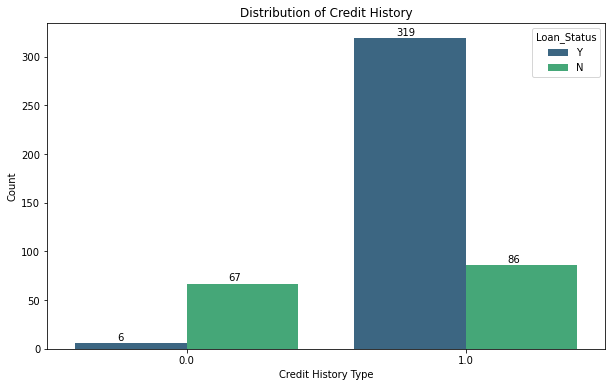

In [30]:
# Bivariate analysis - Credit History on loan eligibility


ch_1 = loan_data["Credit_History"].tolist().count(1)
ch_0 = loan_data["Credit_History"].tolist().count(0)

print("Total number of Good Credit History Applicants are:", ch_1)
print("Total number of Bad Credit History Applicants are:", ch_0)

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Credit_History", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Distribution of Credit History")
plt.xlabel("Credit History Type")
plt.ylabel("Count")
plt.show()

### Observations

Above analysis clearly shows that there are total 478 (Good Credit History 405 + Bad Credit History 73) non null loan applicants.

Out of 405 good Credit history applicants, 319 applicants are eligible for loan (labelled as 'Yes') and 86 applicants are not eligible for loan (labelled as 'No')

    Therefore we can conclude around 79% of Good Credit History applicants are eligible for loans
    
Out of 73 Bad Credit History applicants, 6 applicants are eligible for loan (labelled as 'Yes') and 67 applicants are not eligible for loan eligibility (labelled as 'No')

    Therefore we can conclude less than 1% of Bad Credit History applicants are eligible for loans
    
From above analysis it is evident that applicant with good credit history are elible for loans. Therefore, loan eligibility depends on Credit History. We can consider column "Credit History" might impact loan eligibility. Subsequently, Null hypothesis cannot be rejected.

## Applicant Income

Null Hypothesis : Applicant Income impacts loan eligibility

Alternate Hypothesis : Applicant Income does not impact loan eligibility

In [31]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["ApplicantIncome"].nunique())

print("Total Number of Zero Values are:",loan_data["ApplicantIncome"].tolist().count(0))

print("Total Number of Null Records are:", loan_data["ApplicantIncome"].isnull().sum())

print("Total Number of Records are:", loan_data["ApplicantIncome"].count())

Total Number of Unique Values are: 433
Total Number of Zero Values are: 0
Total Number of Null Records are: 0
Total Number of Records are: 521


C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


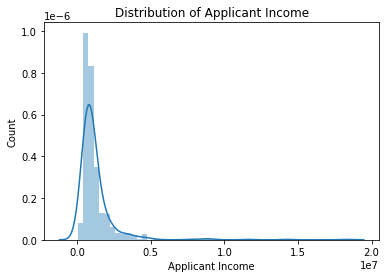

In [32]:
# Univariate Analysis

sns.distplot(x = loan_data["ApplicantIncome"], kde=True)
plt.title("Distribution of Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Count")
plt.show()

Applicant Income is Right Skewed. 

This might be a outlier or might be the nature of data. Further analysis is required

In [33]:
# Checking the IQR range for Applicant Income

q3, q1 = np.percentile(loan_data["ApplicantIncome"], [75,25])
iqr = q3 - q1
print("Inter Quartile Range is:", iqr)

Inter Quartile Range is: 645975.0


In [34]:
# Checking the records beyond accepted IQR region

loan_data["ApplicantIncome"].loc[loan_data["ApplicantIncome"]>1.5*iqr]

0      1316025
1      1031175
4      1350000
5      1218825
9      2889225
        ...   
506    4687425
509    2983950
511    1364625
514    1308375
518    1053675
Name: ApplicantIncome, Length: 214, dtype: int64

There are more than 200 records beyong accepted IQR region. Therefore this might not be outliers. Skewness is caused due to the nature of the data

Text(0.5, 1.0, 'Applicant Income Distribution')

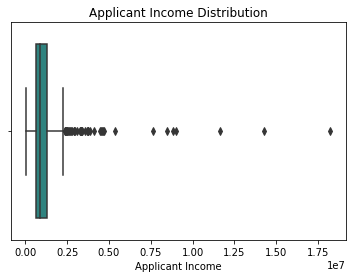

In [35]:
# Box Plot for confirming our analysis

sns.boxplot(data = loan_data, x= "ApplicantIncome", palette="viridis")
plt.xlabel("Applicant Income")
plt.title("Applicant Income Distribution")

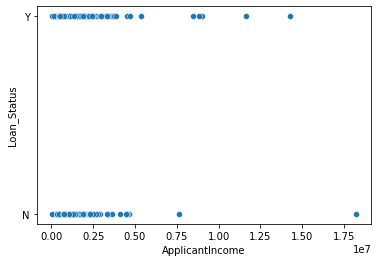

In [36]:
# Bivariate Analysis 

sns.scatterplot(data=loan_data, x="ApplicantIncome", y="Loan_Status", palette="viridis")
plt.show()

### Observations

From above it is evident that, loan eligibility is not directly proportional to the applicant income. An applicant's loan has been accepted with lower income and with higher income and vice versa. 

Therefore, the feature "Applicant income" might impact loan eligibility prediction. Accordingly, the null hypothesis cannot be rejected

## Coapplicant Income

Null Hypothesis : Coapplicant Income impacts loan eligibility

Alternate Hypothesis : Coapplicant Income does not impact loan eligibility

In [37]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["CoapplicantIncome"].nunique())

print("Total Number of Zero Values are:",loan_data["CoapplicantIncome"].tolist().count(0))

print("Total Number of Null Records are:", loan_data["CoapplicantIncome"].isnull().sum())

print("Total Number of Records are:", loan_data["CoapplicantIncome"].count())

Total Number of Unique Values are: 250
Total Number of Zero Values are: 230
Total Number of Null Records are: 0
Total Number of Records are: 521


C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


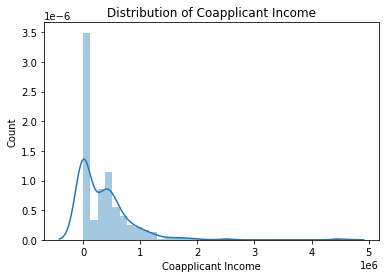

In [38]:
# Univariate Analysis

sns.distplot(x = loan_data["CoapplicantIncome"], kde=True)
plt.title("Distribution of Coapplicant Income")
plt.xlabel("Coapplicant Income")
plt.ylabel("Count")
plt.show()

Coapplicant Income is Right Skewed.

This might be a outlier or might be the nature of data. Further analysis is required

In [39]:
# Checking the IQR range for Coapplicant Income

q3, q1 = np.percentile(loan_data["CoapplicantIncome"], [75,25])
iqr = q3 - q1
print("Inter Quartile Range is:", iqr)

Inter Quartile Range is: 517950.0


In [40]:
# Checking the records beyond accepted IQR region

loan_data["CoapplicantIncome"].loc[loan_data["CoapplicantIncome"]>1.5*iqr]

5       944100.0
9      2467800.0
12     1823850.0
19      787500.0
21     1265625.0
         ...    
503    1192950.0
505     993600.0
506    1500075.0
513    1499850.0
514     824850.0
Name: CoapplicantIncome, Length: 64, dtype: float64

There are more than 64 records beyong accepted IQR region. Therefore this might not be outliers. Skewness is caused due to the nature of the data

Text(0.5, 1.0, 'Coapplicant Income Distribution')

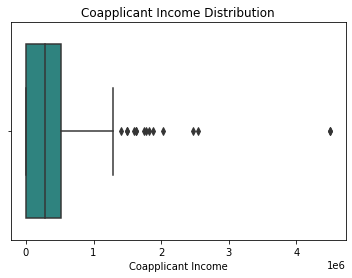

In [41]:
# Box Plot for confirming our analysis

sns.boxplot(data = loan_data, x= "CoapplicantIncome", palette="viridis")
plt.xlabel("Coapplicant Income")
plt.title("Coapplicant Income Distribution")

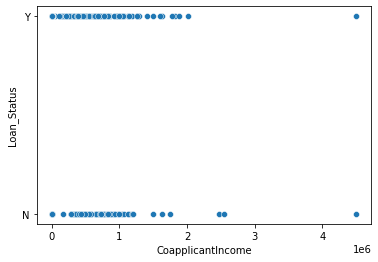

In [42]:
# Bivariate Analysis 

sns.scatterplot(data=loan_data, x="CoapplicantIncome", y="Loan_Status", palette="viridis")
plt.show()

### Observations

From above it is evident that, loan eligibility is not directly proportional to the Coapplicant income. An applicant's loan has been accepted with lower income and with higher income and vice versa. This follows similar distribution as applicant Income.

Therefore, the feature "Coapplicant income" might impact loan eligibility prediction. Accordingly, the null hypothesis cannot be rejected

## Loan Amount

Null Hypothesis : Loan Amount impacts loan eligibility

Alternate Hypothesis : Loan Amount Income does not impact loan eligibility

In [43]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["LoanAmount"].nunique())

print("Total Number of Zero Values are:",loan_data["LoanAmount"].tolist().count(0))

print("Total Number of Null Records are:", loan_data["LoanAmount"].isnull().sum())

print("Total Number of Records are:", loan_data["LoanAmount"].count())

Total Number of Unique Values are: 185
Total Number of Zero Values are: 17
Total Number of Null Records are: 0
Total Number of Records are: 521


C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


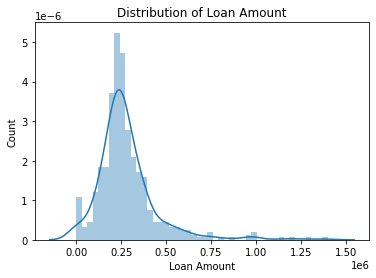

In [44]:
# Univariate Analysis

sns.distplot(x = loan_data["LoanAmount"], kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

Coapplicant Income is Right Skewed.

This might be a outlier or might be the nature of data. Further analysis is required

In [45]:
# Checking the IQR range for Loan Amount

q3, q1 = np.percentile(loan_data["LoanAmount"], [75,25])
iqr = q3 - q1
print("Inter Quartile Range is:", iqr)

Inter Quartile Range is: 124000.0


In [46]:
# Checking the records beyond accepted IQR region

loan_data["LoanAmount"].loc[loan_data["LoanAmount"]>1.5*iqr]

0      250000
1      256000
3      240000
4      282000
5      534000
        ...  
515    300000
516    226000
517    246000
518    370000
519    190000
Name: LoanAmount, Length: 412, dtype: int64

There are more than 412 records beyong accepted IQR region. Therefore this might not be outliers. Skewness is caused due to the nature of the data

Text(0.5, 1.0, 'Loan Amount Distribution')

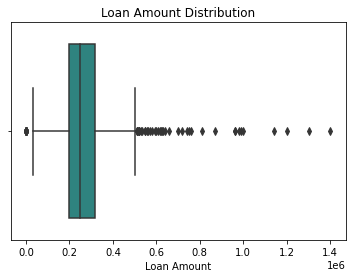

In [47]:
# Box Plot for confirming our analysis

sns.boxplot(data = loan_data, x= "LoanAmount", palette="viridis")
plt.xlabel("Loan Amount")
plt.title("Loan Amount Distribution")

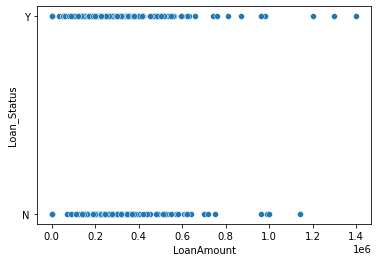

In [48]:
# Bivariate Analysis 

sns.scatterplot(data=loan_data, x="LoanAmount", y="Loan_Status", palette="viridis")
plt.show()

### Observations

From above it is evident that, loan eligibility is not directly proportional to the Loan Amount. An applicant's loan has been accepted with lower loan amount and higher loan amount and vice versa. 

Therefore, the feature "Coapplicant income" might impact loan eligibility prediction. Accordingly, the null hypothesis cannot be rejected

## Loan Amount Term

Null Hypothesis : Loan Amount Term impacts loan eligibility

Alternate Hypothesis : Loan Amount Term does not impact loan eligibility

In [49]:
# Checking for the unique values and null values of the column

print("Total Number of Unique Values are:",loan_data["Loan_Amount_Term"].nunique())

print("Total Number of Zero Values are:",loan_data["Loan_Amount_Term"].tolist().count(0))

print("Total Number of Null Records are:", loan_data["Loan_Amount_Term"].isnull().sum())

print("Total Number of Records are:", loan_data["Loan_Amount_Term"].count())

Total Number of Unique Values are: 10
Total Number of Zero Values are: 0
Total Number of Null Records are: 14
Total Number of Records are: 507


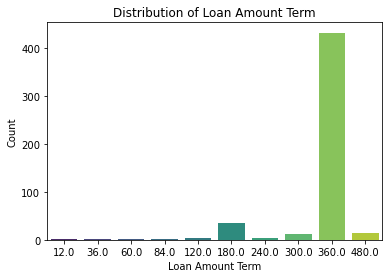

In [50]:
# Univariate Analysis

sns.countplot(data = loan_data, x = "Loan_Amount_Term", palette= "viridis")
plt.title("Distribution of Loan Amount Term")
plt.xlabel("Loan Amount Term")
plt.ylabel("Count")
plt.show()

C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


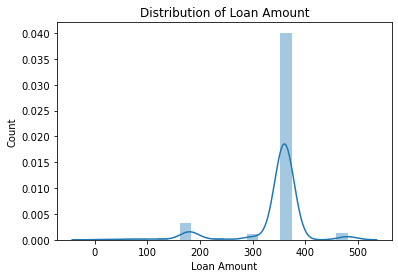

In [51]:
# Univariate Analysis

sns.distplot(x = loan_data["Loan_Amount_Term"], kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

Total Count of Loan Amount Term are:
 360.0    432
180.0     36
480.0     14
300.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64


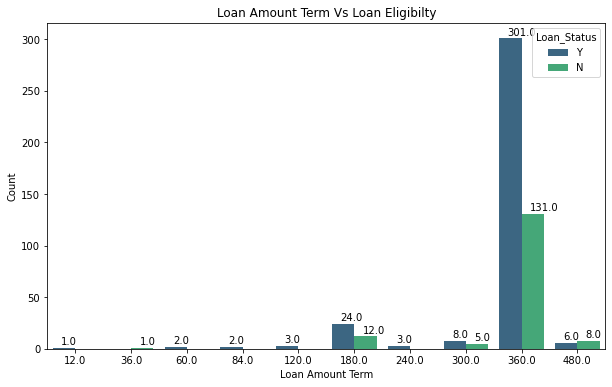

In [52]:
# Bivariate analysis - Loan Amount Term on loan eligibility

print("Total Count of Loan Amount Term are:\n",loan_data["Loan_Amount_Term"].value_counts())

plt.figure(figsize=(10,6))
ax = sns.countplot(data = loan_data, x = "Loan_Amount_Term", palette="viridis", hue="Loan_Status")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+3))
    
plt.title("Loan Amount Term Vs Loan Eligibilty")
plt.xlabel("Loan Amount Term")
plt.ylabel("Count")
plt.show()

### Observations

From above it is evident that, majority of loan amount term is around 360 wherein around 70% of loans are approved.

Further, it is pertinent to note that, lower the loan amount term, greater the probability of loan eligibility. Therefore feature "Loan Amount Term" does influence loan eigibility of applicant. Accordingly, null hypothesis cannot be rejected

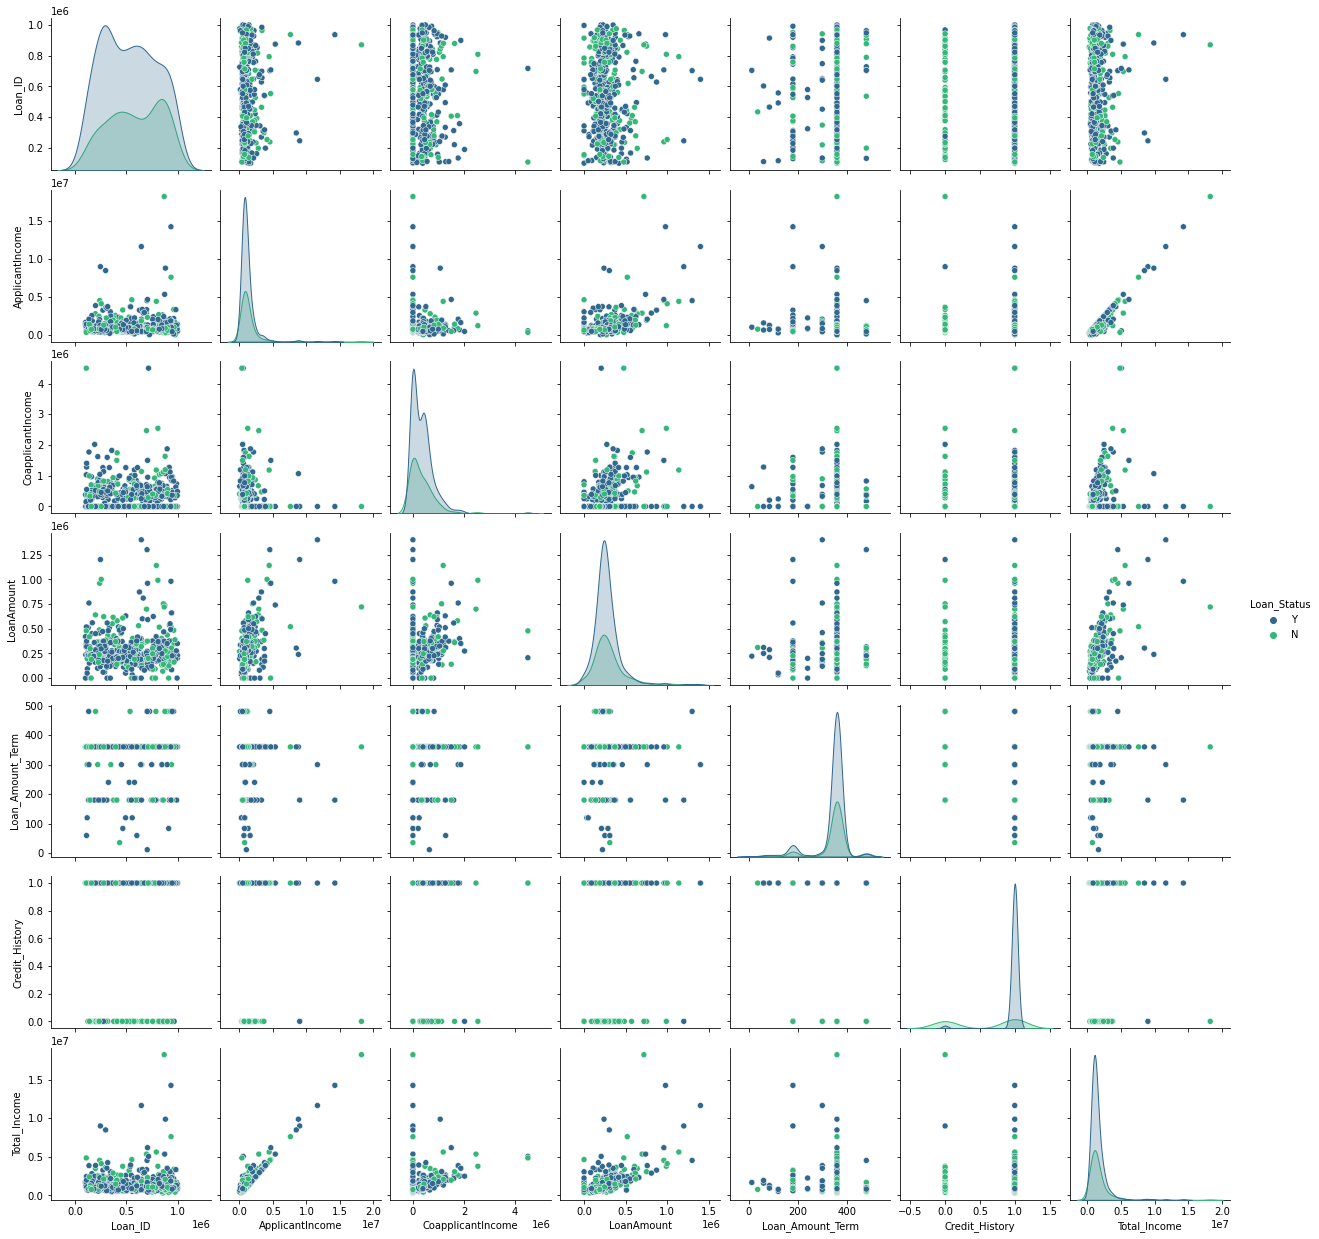

In [53]:
# Plotting Pair Plot

sns.pairplot( data = loan_data, palette="viridis", hue = "Loan_Status")
plt.show()

From above, note that irrespective of the income of applicants, majority of applicants applied for lower loan amount

# Notes:

During my initial analysis in milestone 1, there was apparent conclusion that columns loan amount term & education might not impact on loan eligibility of applicants. However, after initial analysis on data, all the above mentioned columns are impacting loan eligibility of applicants

Apart from this, previous initial hypothesis holds true

# Data Preprocessing

## Missing Value Treatment

In [54]:
# Checking null value percentage in each attribute

round((loan_data.isnull().sum()/loan_data["Loan_ID"].count())*100,2)

Loan_ID              0.00
Gender               1.92
Married              0.58
Dependents           2.50
Education            0.00
Self_Employed        5.18
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     2.69
Credit_History       8.25
Property_Area        0.00
Loan_Status          0.00
Total_Income         0.00
dtype: float64

Therefore, null values needs to treated for the following attributes
1. Gender
2. Married
3. Dependents
4. Self_Employed
5. Loan_Amount_Term
6. Credit_history

### Gender

In [55]:
# Checking Basic Information 

print("Total number of null records are:", loan_data["Gender"].isnull().sum())

print("Unique Values are:",loan_data["Gender"].unique())

Total number of null records are: 10
Unique Values are: ['Male' 'Female' nan]


Since the attribute is object datatype, missing values shall be replace by mode values.

Also, in line with our above analysis, we know that the proportion of male applicants are higher than female applicants.
The ratio of male : female stands approximaletly 4.3 : 1.0

In [56]:
# Checking the mode value for missing value imputation

gen_mode=loan_data["Gender"].mode()
gen_mode

0    Male
Name: Gender, dtype: object

This confirms our initial analysis stating Male applicants are on the higher side. Therefore missing records shall be imputed with mode value

In [57]:
# Checking the record of missing values

loan_data.loc[loan_data["Gender"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
23,416319,NaN,Yes,2,Not Graduate,No,757125,431325.0,224000,360.0,0.0,Rural,N,1188450.0
126,874101,NaN,Yes,3+,Graduate,No,5355675,0.0,740000,360.0,1.0,Rural,Y,5355675.0
171,646048,NaN,Yes,3+,Graduate,No,11646675,0.0,1400000,300.0,1.0,Urban,Y,11646675.0
188,578889,NaN,Yes,0,Graduate,Yes,151650,1191600.0,336000,360.0,1.0,Rural,Y,1343250.0
314,805098,NaN,Yes,0,Graduate,No,556425,414675.0,318000,360.0,1.0,Rural,N,971100.0
334,548233,NaN,Yes,1,Graduate,Yes,2212425,412425.0,364000,180.0,1.0,Urban,Y,2624850.0
460,527705,NaN,Yes,0,Graduate,Yes,468675,918675.0,320000,360.0,NaN,Semiurban,Y,1387350.0
467,539042,NaN,Yes,0,Graduate,No,3755700,0.0,220000,360.0,1.0,Semiurban,Y,3755700.0
477,900615,NaN,Yes,2,Graduate,No,646425,421200.0,264000,360.0,0.0,Semiurban,N,1067625.0
507,578331,NaN,No,0,Graduate,No,806175,0.0,192000,360.0,1.0,Urban,N,806175.0


In [58]:
# Imputation of Missing Value with mode value

loan_data["Gender"].fillna("Male", inplace = True)

In [59]:
# Checking number of null values after imputation

print("Total number of null records are:", loan_data["Gender"].isnull().sum())

Total number of null records are: 0


### Married

In [60]:
# Checking Basic Information 

print("Total number of null records are:", loan_data["Married"].isnull().sum())

print("Unique Values are:",loan_data["Married"].unique())

Total number of null records are: 3
Unique Values are: ['No' 'Yes' nan]


Since the attribute is object datatype, missing values shall be replace by mode values.

Also, in line with our above analysis, we know that the proportion of married applicants are higher than unmarried applicants.


The ratio of married : unmarried stands approximaletly 1.8 : 1.0

In [61]:
# Checking the mode value for missing value imputation

loan_data["Married"].mode()

0    Yes
Name: Married, dtype: object

This confirms our initial analysis stating Married applicants are on the higher side. Therefore missing records shall be imputed with mode value

In [62]:
# Checking the record of missing values

loan_data.loc[loan_data["Married"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
104,114100,Male,NaN,NaN,Graduate,No,858600,169650.0,320000,360.0,1.0,Urban,Y,1028250.0
228,133107,Male,NaN,NaN,Graduate,No,1070550,0.0,316000,480.0,1.0,Semiurban,Y,1070550.0
435,579487,Female,NaN,NaN,Graduate,No,2260575,0.0,0,240.0,1.0,Semiurban,Y,2260575.0


In [63]:
# Imputation of Missing Value with mode value

loan_data["Married"].fillna("Yes", inplace = True)

In [64]:
# Checking number of null values after imputation

print("Total number of null records are:", loan_data["Married"].isnull().sum())

Total number of null records are: 0


### Self Employed

In [65]:
# Checking Basic Information 

print("Total number of null records are:", loan_data["Self_Employed"].isnull().sum())

print("Unique Values are:",loan_data["Self_Employed"].unique())

Total number of null records are: 27
Unique Values are: ['No' 'Yes' nan]


In [66]:
# Checking count of employent type

loan_data["Self_Employed"].value_counts()

No     427
Yes     67
Name: Self_Employed, dtype: int64

Since the attribute is object datatype, missing values shall be replace by mode values.

Also, in line with our above analysis, we know that the proportion of non self employed applicants are higher than self employed applicants.


The ratio of self employed : non self employed stands approximaletly 1.0 : 6.4

In [67]:
# Checking the mode value for missing value imputation

loan_data["Self_Employed"].mode()

0    No
Name: Self_Employed, dtype: object

This confirms our initial analysis stating non self employed applicants are on the higher side. Therefore missing records shall be imputed with mode value

In [68]:
# Checking the record of missing values

loan_data.loc[loan_data["Self_Employed"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
11,312206,Male,Yes,2,Graduate,NaN,562500,414000.0,218000,360.0,1.0,Urban,Y,976500.0
19,342238,Male,Yes,0,Graduate,NaN,585000,787500.0,230000,NaN,1.0,Urban,Y,1372500.0
24,776219,Male,Yes,1,Graduate,NaN,836325,658125.0,302000,360.0,NaN,Semiurban,N,1494450.0
29,638217,Female,No,2,Graduate,NaN,843750,468675.0,240000,360.0,1.0,Semiurban,Y,1312425.0
30,844094,Male,Yes,1,Graduate,NaN,937350,758025.0,402000,360.0,NaN,Urban,N,1695375.0
95,782550,Male,No,0,Graduate,NaN,1525950,0.0,0,360.0,NaN,Urban,N,1525950.0
107,799960,Male,No,0,Not Graduate,NaN,1649925,0.0,240000,360.0,1.0,Rural,N,1649925.0
111,806403,Female,Yes,0,Graduate,NaN,659025,524925.0,278000,360.0,1.0,Semiurban,Y,1183950.0
114,104139,Male,No,0,Graduate,NaN,1136250,0.0,236000,360.0,1.0,Semiurban,Y,1136250.0
158,140148,Male,No,0,Graduate,NaN,670500,468675.0,240000,360.0,1.0,Rural,Y,1139175.0


In [69]:
# Imputation of Missing Value with mode value

loan_data["Self_Employed"].fillna("No", inplace = True)

In [70]:
# Checking number of null values after imputation

print("Total number of null records are:", loan_data["Self_Employed"].isnull().sum())

Total number of null records are: 0


### Dependents

In [71]:
# Checking Basic Information 

print("Total number of null records are:", loan_data["Dependents"].isnull().sum())

print("Unique Values are:",loan_data["Dependents"].unique())

Total number of null records are: 13
Unique Values are: [0 1 2 '3+' nan]


As indicated, dependents feature has combination of integer and string datatype

For building ML model, we need to convert the string datatype to int or float and encode the same. Therefore, let us replace the value "3+" as 3 for the entire column

In [72]:
# Replacing dependnts 3+ to 3

loan_data["Dependents"].replace("3+", 3, inplace = True)

In [73]:
# Checking Unique values after replacement

print("Unique Values are:",loan_data["Dependents"].unique())

Unique Values are: [ 0.  1.  2.  3. nan]


To impute null values, lets check the count of dependents based on the marital status. Eventhough these two are independent of each other, a general understanding is that probability of number of dependents might be higher for married applicants. Lets Check!

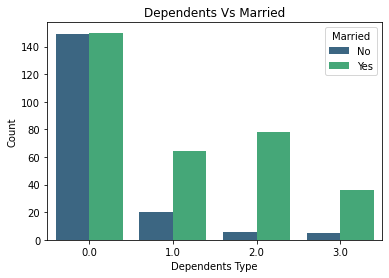

In [74]:
# Plotting Dependents vs Married

sns.countplot(data = loan_data, x = "Dependents", hue = "Married", palette= "viridis")
plt.title("Dependents Vs Married")
plt.xlabel("Dependents Type")
plt.ylabel("Count")
plt.show()

Number of dependents is independent of the marital status. Therefore null values to be imputed with mode value as majority has zero dependents

In [75]:
# Checking the record of missing values

loan_data.loc[loan_data["Dependents"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
102,343597,Male,Yes,NaN,Graduate,No,3071250,0.0,0,360.0,1.0,Urban,Y,3071250.0
104,114100,Male,Yes,NaN,Graduate,No,858600,169650.0,320000,360.0,1.0,Urban,Y,1028250.0
120,187026,Male,Yes,NaN,Graduate,No,1275075,600075.0,360000,360.0,1.0,Rural,Y,1875150.0
226,921694,Male,Yes,NaN,Not Graduate,Yes,1065375,0.0,276000,360.0,1.0,Urban,N,1065375.0
228,133107,Male,Yes,NaN,Graduate,No,1070550,0.0,316000,480.0,1.0,Semiurban,Y,1070550.0
293,199610,Female,No,NaN,Graduate,No,1218825,0.0,286000,480.0,0.0,Urban,N,1218825.0
301,503523,Male,Yes,NaN,Not Graduate,No,646875,393750.0,210000,360.0,1.0,Semiurban,Y,1040625.0
332,590336,Male,No,NaN,Graduate,No,637425,0.0,142000,360.0,1.0,Urban,Y,637425.0
335,584013,Male,Yes,NaN,Graduate,Yes,1238175,1010250.0,140000,NaN,1.0,Semiurban,Y,2248425.0
346,578710,Male,Yes,NaN,Not Graduate,No,792675,726750.0,304000,360.0,0.0,Rural,N,1519425.0


In [76]:
# Checking the mode value for missing value imputation

loan_data["Dependents"].mode()

0    0.0
Name: Dependents, dtype: float64

In [77]:
# Imputation of Missing Value with mode value

loan_data["Dependents"].fillna(0, inplace = True)

In [78]:
# Checking number of null values after imputation

print("Total number of null records are:", loan_data["Dependents"].isnull().sum())

Total number of null records are: 0


### Loan Amount Term

In [79]:
# Checking Basic Information 

print("Total number of null records are:", loan_data["Loan_Amount_Term"].isnull().sum())

print("Unique Values are:",loan_data["Loan_Amount_Term"].unique())

Total number of null records are: 14
Unique Values are: [360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]


There are various loan terms. However, from the above visualization we are aware that 70% of the loans are 360. Therefore, the null values are to be replace with mode values

In [80]:
# Checking count of Loan Amount Term type

loan_data["Loan_Amount_Term"].value_counts()

360.0    432
180.0     36
480.0     14
300.0     13
120.0      3
240.0      3
60.0       2
84.0       2
36.0       1
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [81]:
# Checking the mode value for missing value imputation

loan_data["Loan_Amount_Term"].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

This confirms our initial analysis stating loan amount term of 360 is on the higher side. Therefore missing records shall be imputed with mode value

In [82]:
# Checking the record of missing values

loan_data.loc[loan_data["Loan_Amount_Term"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
19,342238,Male,Yes,0.0,Graduate,No,585000,787500.0,230000,NaN,1.0,Urban,Y,1372500.0
36,456712,Male,Yes,0.0,Graduate,No,411300,299250.0,200000,NaN,0.0,Urban,N,710550.0
44,342635,Male,Yes,0.0,Not Graduate,Yes,1056375,0.0,192000,NaN,1.0,Urban,Y,1056375.0
45,546000,Female,No,0.0,Graduate,No,767250,0.0,176000,NaN,1.0,Urban,Y,767250.0
73,804903,Male,Yes,3.0,Not Graduate,No,1069875,0.0,190000,NaN,0.0,Semiurban,N,1069875.0
112,775250,Male,Yes,0.0,Not Graduate,No,803700,925650.0,304000,NaN,0.0,Rural,N,1729350.0
165,349592,Male,Yes,0.0,Graduate,No,834075,712350.0,364000,NaN,1.0,Rural,Y,1546425.0
197,166462,Female,No,0.0,Not Graduate,No,429075,532125.0,240000,NaN,1.0,Urban,Y,961200.0
223,322083,Male,Yes,0.0,Graduate,No,1705050,227250.0,350000,NaN,1.0,Semiurban,Y,1932300.0
232,343581,Male,No,0.0,Not Graduate,No,717525,584550.0,240000,NaN,1.0,Rural,Y,1302075.0


In [83]:
# Imputation of Missing Value with mode value

loan_data["Loan_Amount_Term"].fillna(360, inplace = True)

In [84]:
# Checking number of null values after imputation

print("Total number of null records are:", loan_data["Loan_Amount_Term"].isnull().sum())

Total number of null records are: 0


### Credit History

In [85]:
# Checking Basic Information 

print("Total number of null records are:", loan_data["Credit_History"].isnull().sum())

print("Unique Values are:",loan_data["Credit_History"].unique())

Total number of null records are: 43
Unique Values are: [ 1.  0. nan]


From our hypothesis considered above, we concluded that credit history impacts loan eligibility. 

To impute null values of credit history, we shall consider loan eligibilty of such applicants. 

If the loan eligibility of a particular applicant is "Y" then the null values of cfedit history shall be imputed as 1
else 0

In [86]:
# Checking count of Credit History Type

loan_data["Credit_History"].value_counts()

1.0    405
0.0     73
Name: Credit_History, dtype: int64

In [87]:
# Checking the record of missing values

loan_data.loc[loan_data["Credit_History"].isnull()] 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
16,325054,Male,No,1.0,Not Graduate,No,809100,0.0,200000,240.0,NaN,Urban,Y,809100.0
24,776219,Male,Yes,1.0,Graduate,No,836325,658125.0,302000,360.0,NaN,Semiurban,N,1494450.0
30,844094,Male,Yes,1.0,Graduate,No,937350,758025.0,402000,360.0,NaN,Urban,N,1695375.0
42,727995,Male,Yes,0.0,Graduate,No,540000,0.0,150000,360.0,NaN,Urban,Y,540000.0
79,272664,Male,Yes,3.0,Not Graduate,Yes,749925,487350.0,260000,360.0,NaN,Semiurban,Y,1237275.0
83,619233,Male,Yes,0.0,Graduate,No,1350000,506250.0,530000,360.0,NaN,Semiurban,N,1856250.0
86,543412,Male,Yes,2.0,Not Graduate,No,749925,450000.0,198000,360.0,NaN,Semiurban,Y,1199925.0
95,782550,Male,No,0.0,Graduate,No,1525950,0.0,0,360.0,NaN,Urban,N,1525950.0
117,798461,Male,Yes,1.0,Graduate,No,498150,314550.0,170000,360.0,NaN,Urban,Y,812700.0
125,419393,Female,No,0.0,Graduate,No,830700,0.0,186000,360.0,NaN,Rural,Y,830700.0


In [88]:
# Imputing null values meeting the below condition with 1

loan_data["Credit_History"].loc[(loan_data["Credit_History"].isnull()) & (loan_data["Loan_Status"] == "Y")] = 1

C:\Users\srini\AppData\Local\Temp\ipykernel_27316\3361055610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["Credit_History"].loc[(loan_data["Credit_History"].isnull()) & (loan_data["Loan_Status"] == "Y")] = 1


In [89]:
# Imputing null values meeting the below condition with 0

loan_data["Credit_History"].loc[(loan_data["Credit_History"].isnull()) & ~(loan_data["Loan_Status"] == "Y")] = 0

C:\Users\srini\AppData\Local\Temp\ipykernel_27316\1638768245.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data["Credit_History"].loc[(loan_data["Credit_History"].isnull()) & ~(loan_data["Loan_Status"] == "Y")] = 0


In [90]:
# Checking number of null values after imputation

print("Total number of null records are:", loan_data["Credit_History"].isnull().sum())

Total number of null records are: 0


# Feature Engineering

### Total Income

Dataset consists of two types of income
1. Applicant Income
2. Coapplicant Income

From above initial hypothesis testing, we had concluded that total income (applicant & coapplicant) might impact om loan eligibility. Loan amount shall be compared based on the toal income. Therefore, this attribute is being created.


In [91]:
# Total Income has been created by adding applicant and coaplicant income

loan_data["Total_Income"].head()

0    1316025.0
1    1370475.0
2     675000.0
3    1111725.0
4    1350000.0
Name: Total_Income, dtype: float64

Null Hypothesis : Total Income shall impact loan eligibility

Alternate Hypothesis: Total Income shall not impact loan eligibility

C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


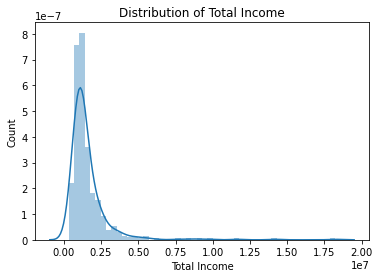

In [92]:
# Univariate Analysis

sns.distplot(x = loan_data["Total_Income"], kde=True)
plt.title("Distribution of Total Income")
plt.xlabel("Total Income")
plt.ylabel("Count")
plt.show()

Total Income is Right Skewed similar to applicant and coapplicant income.

This might be a outlier or might be the nature of data. Further analysis is required

In [93]:
# Checking the IQR range for Loan Amount

q3, q1 = np.percentile(loan_data["Total_Income"], [75,25])
iqr = q3 - q1
print("Inter Quartile Range is:", iqr)

Inter Quartile Range is: 759600.0


In [94]:
# Checking the records beyond accepted IQR region

loan_data["ApplicantIncome"].loc[loan_data["ApplicantIncome"]>1.5*iqr]

0      1316025
4      1350000
5      1218825
9      2889225
20     1723500
        ...   
499    1413675
506    4687425
509    2983950
511    1364625
514    1308375
Name: ApplicantIncome, Length: 158, dtype: int64

There are more than 150 records beyong accepted IQR region. Therefore this might not be outliers. Skewness is caused due to the nature of the data

Text(0.5, 1.0, 'Total Income Distribution')

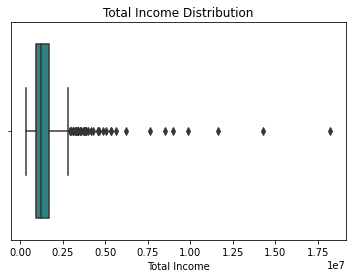

In [95]:
# Box Plot for confirming our analysis

sns.boxplot(data = loan_data, x= "Total_Income", palette="viridis")
plt.xlabel("Total Income")
plt.title("Total Income Distribution")

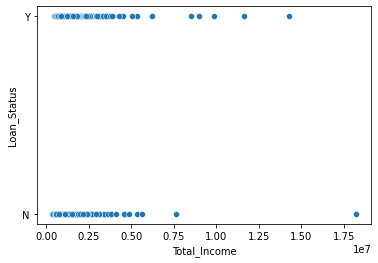

In [96]:
# Bivariate Analysis 

sns.scatterplot(data=loan_data, x="Total_Income", y="Loan_Status", palette="viridis")
plt.show()

Observations
From above it is evident that, loan eligibility is not directly proportional to the Total income. An applicant's loan has been accepted with lower income and with higher income and vice versa. This follows similar distribution as applicant and coapplicant Income.

Therefore, the feature "Total income" might impact loan eligibility prediction. Accordingly, the null hypothesis cannot be rejected

### Loan Percentage with respect to applicant income

This suggests percentage of loan amount requested by the applicant to his income. Further this help further to undestand loan percentage on loan eligibility.

In [97]:
# Creating new attribute

loan_data["Loan_Aincome%"] = round((loan_data["LoanAmount"]/loan_data["ApplicantIncome"])*100,2)

In [98]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%
0,294853,Male,No,0.0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y,1316025.0,19.00
1,162883,Male,Yes,1.0,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N,1370475.0,24.83
2,620668,Male,Yes,0.0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y,675000.0,19.56
3,295747,Male,Yes,0.0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y,1111725.0,41.30
4,133390,Male,No,0.0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y,1350000.0,20.89


Hypothesis Testing:

Null Hypothesis : Loan_Aincome% shall impact loan eligibility

Alternate Hypothesis: Loan_Aincome% shall not impact loan eligibility

C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


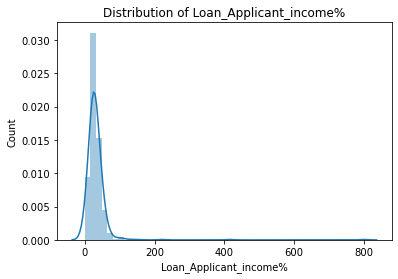

In [99]:
# Univariate Analysis

sns.distplot(x = loan_data["Loan_Aincome%"], kde=True)
plt.title("Distribution of Loan_Applicant_income%")
plt.xlabel("Loan_Applicant_income%")
plt.ylabel("Count")
plt.show()

Above distribution is Right Skewed similar to applicant and coapplicant income.

This might be a outlier or might be the nature of data. Further analysis is required

Text(0.5, 1.0, 'Distribution of Loan_Applicant_income%')

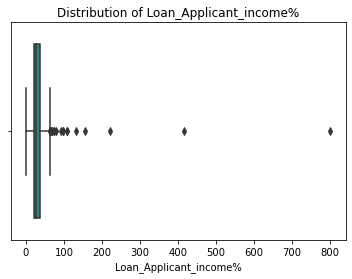

In [100]:
# Box Plot

sns.boxplot(data = loan_data, x= "Loan_Aincome%", palette="viridis")
plt.xlabel("Loan_Applicant_income%")
plt.title("Distribution of Loan_Applicant_income%")

Majority of applicant's loan amount are close to 150% mark of their income. However, there are very few records where loan amount percentage are very hight reaching upto 800% of their income

Therefore an new attribute checking the loan amount percentage aganist total income shall be created moving forward

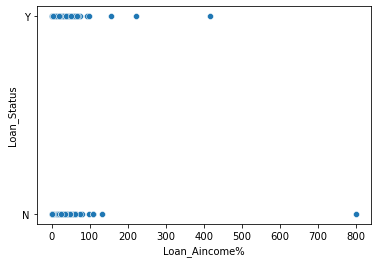

In [101]:
# Bivariate Analysis 

sns.scatterplot(data=loan_data, x="Loan_Aincome%", y="Loan_Status", palette="viridis")
plt.show()

As evident, loan status of applicant whose loan amount % is around 800 is rejected. However, loans are accepted for applicants whose loan to income percentage is more than 150%. This approval might be influenced by the co-applicant income which shall be assesed further

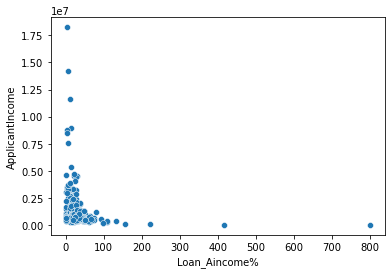

In [102]:
# Bivariate Analysis of Loan to Applicant Income % and Applicant Income

sns.scatterplot(data=loan_data, x="Loan_Aincome%", y="ApplicantIncome", palette="viridis")
plt.show()

Above graph clearly shows that loan amount requested is very higher than the applicant income for the applicants whose loan amount percentages are more than 200. Further, the same to be assessed using total income of applicants

In [103]:
loan_data.loc[loan_data["Loan_Aincome%"]>150]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%
188,578889,Male,Yes,0.0,Graduate,Yes,151650,1191600.0,336000,360.0,1.0,Rural,Y,1343250.0,221.56
216,976402,Male,Yes,0.0,Graduate,No,33750,405000.0,270000,360.0,1.0,Rural,N,438750.0,800.00
468,725301,Female,Yes,2.0,Not Graduate,No,47250,656325.0,196000,360.0,1.0,Semiurban,Y,703575.0,414.81
500,961214,Female,No,0.0,Graduate,No,145125,828675.0,226000,480.0,1.0,Rural,Y,973800.0,155.73


### Observations 

From above it is evident that, loan eligibility is not directly proportional to the Applicant Income to Loan%. An applicant's loan has been accepted with lower and higher applicant income to loan % and vice versa. 

Therefore, the feature "Loan_Aincome%" might impact loan eligibility prediction. Accordingly, the null hypothesis cannot be rejected

### Loan Percentage with respect to total income

Hypothesis Testing:

Null Hypothesis : Loan_Tincome% shall impact loan eligibility

Alternate Hypothesis: Loan_Tincome% shall not impact loan eligibility

This suggests percentage of loan amount requested by the applicant to his Total income. Further this help further to undestand loan percentage on loan eligibility.

In [104]:
# Creating new attribute

loan_data["Loan_Tincome%"] = round((loan_data["LoanAmount"]/loan_data["Total_Income"])*100,2)

In [105]:
# Overview of dataset

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%,Loan_Tincome%
0,294853,Male,No,0.0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y,1316025.0,19.00,19.00
1,162883,Male,Yes,1.0,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N,1370475.0,24.83,18.68
2,620668,Male,Yes,0.0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y,675000.0,19.56,19.56
3,295747,Male,Yes,0.0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y,1111725.0,41.30,21.59
4,133390,Male,No,0.0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y,1350000.0,20.89,20.89


C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


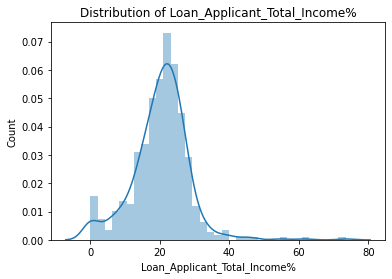

In [106]:
# Univariate Analysis

sns.distplot(x = loan_data["Loan_Tincome%"], kde=True)
plt.title("Distribution of Loan_Applicant_Total_Income%")
plt.xlabel("Loan_Applicant_Total_Income%")
plt.ylabel("Count")
plt.show()

Above distribution is Right Skewed. However skewness has been reduced compared to Loan_Aincome% attribute.

This might be a outlier or might be the nature of data. Further analysis is required

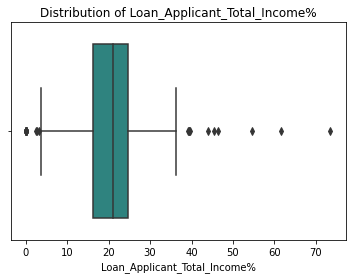

In [107]:
# Box Plot

sns.boxplot(data = loan_data, x= "Loan_Tincome%", palette="viridis")
plt.xlabel("Loan_Applicant_Total_Income%")
plt.title("Distribution of Loan_Applicant_Total_Income%")
plt.show()

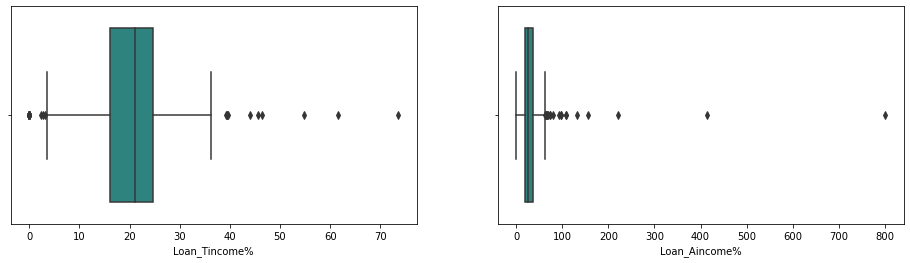

In [108]:

fig, ax = plt.subplots(1,2,figsize = (16,4))
sns.boxplot(data = loan_data, x= "Loan_Tincome%", palette="viridis", ax = ax[0])
sns.boxplot(data = loan_data, x= "Loan_Aincome%", palette="viridis", ax = ax[1])
plt.show()


Previously when only applicant income is considered to guage loan amount percentage, very high percentages ranging upto 800 were evident. However, when total income is considered, the variance of loan amount percentage has reduce to approx. 80. Further, none of the loan amounts is greater than the applicant total income.


Therefore we might conclude that total income is considered for loan eligibility of applicants

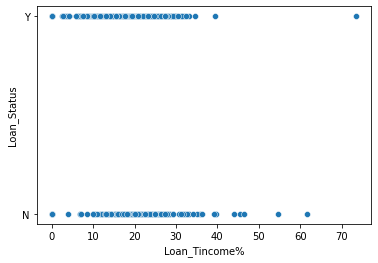

In [109]:
# Bivariate Analysis 

sns.scatterplot(data=loan_data, x="Loan_Tincome%", y="Loan_Status", palette="viridis")
plt.show()

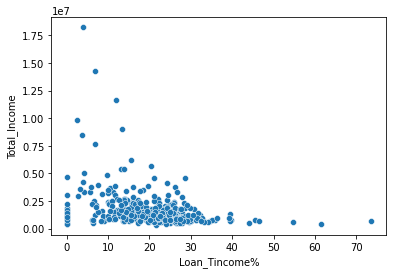

In [110]:
# Bivariate Analysis of Loan to Applicant Income % and Total Income

sns.scatterplot(data=loan_data, x="Loan_Tincome%", y="Total_Income", palette="viridis")
plt.show()

In [111]:
loan_data.loc[loan_data["Loan_Tincome%"]>40]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%,Loan_Tincome%
82,884565,Female,Yes,2.0,Graduate,No,310050,423225.0,334000,360.0,1.0,Urban,N,733275.0,107.72,45.55
153,368231,Male,Yes,2.0,Not Graduate,No,513225,0.0,226000,360.0,1.0,Rural,N,513225.0,44.04,44.04
216,976402,Male,Yes,0.0,Graduate,No,33750,405000.0,270000,360.0,1.0,Rural,N,438750.0,800.00,61.54
225,384728,Male,Yes,0.0,Graduate,No,731250,0.0,340000,360.0,1.0,Rural,N,731250.0,46.50,46.50
255,127867,Female,No,3.0,Graduate,No,693675,0.0,510000,360.0,1.0,Rural,Y,693675.0,73.52,73.52
416,487495,Female,No,1.0,Graduate,No,585000,0.0,320000,360.0,1.0,Urban,N,585000.0,54.70,54.70


### Observations

From above it is evident that, loan eligibility is not directly proportional to the Total Income to Loan%. An applicant's loan has been accepted with lower and higher Total income to loan % and vice versa.

Therefore, the feature "Loan_Tincome%" might impact loan eligibility prediction. Accordingly, the null hypothesis cannot be rejected

### Loan Amount Per Month

Indicates the loan amount due every month for the loan amount term period

In [112]:
# Creating new attribute

loan_data["Loan_Amt_per_month"] = round(loan_data["LoanAmount"]/loan_data["Loan_Amount_Term"],2)

In [113]:
# Data Overview

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%,Loan_Tincome%,Loan_Amt_per_month
0,294853,Male,No,0.0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y,1316025.0,19.00,19.00,694.44
1,162883,Male,Yes,1.0,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N,1370475.0,24.83,18.68,711.11
2,620668,Male,Yes,0.0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y,675000.0,19.56,19.56,366.67
3,295747,Male,Yes,0.0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y,1111725.0,41.30,21.59,666.67
4,133390,Male,No,0.0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y,1350000.0,20.89,20.89,783.33


C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


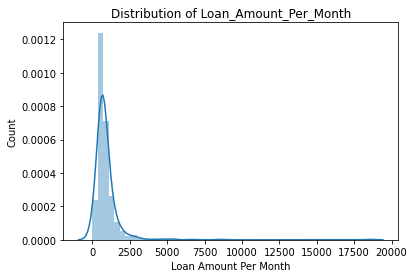

In [114]:
# Univariate Analysis

sns.distplot(x = loan_data["Loan_Amt_per_month"], kde=True)
plt.title("Distribution of Loan_Amount_Per_Month")
plt.xlabel("Loan Amount Per Month")
plt.ylabel("Count")
plt.show()

Above distribution is Right Skewed.

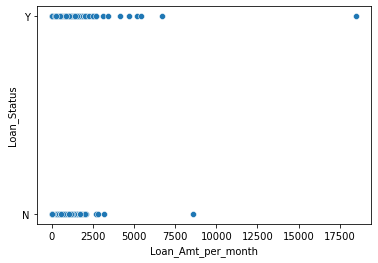

In [115]:
# Bivariate Analysis 

sns.scatterplot(data=loan_data, x="Loan_Amt_per_month", y="Loan_Status", palette="viridis")
plt.show()

### Observations
From above it is evident that, loan eligibility is not directly proportional to the Loan amount per month. 

Therefore, the feature "Loan_Amt_Per_Month" might impact loan eligibility prediction. Accordingly, the null hypothesis cannot be rejected

In [116]:
# Final Overview of dataset

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%,Loan_Tincome%,Loan_Amt_per_month
0,294853,Male,No,0.0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y,1316025.0,19.00,19.00,694.44
1,162883,Male,Yes,1.0,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N,1370475.0,24.83,18.68,711.11
2,620668,Male,Yes,0.0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y,675000.0,19.56,19.56,366.67
3,295747,Male,Yes,0.0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y,1111725.0,41.30,21.59,666.67
4,133390,Male,No,0.0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y,1350000.0,20.89,20.89,783.33


In [117]:
# Final Check for null values

loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income          0
Loan_Aincome%         0
Loan_Tincome%         0
Loan_Amt_per_month    0
dtype: int64

In [118]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             521 non-null    int64  
 1   Gender              521 non-null    object 
 2   Married             521 non-null    object 
 3   Dependents          521 non-null    float64
 4   Education           521 non-null    object 
 5   Self_Employed       521 non-null    object 
 6   ApplicantIncome     521 non-null    int64  
 7   CoapplicantIncome   521 non-null    float64
 8   LoanAmount          521 non-null    int64  
 9   Loan_Amount_Term    521 non-null    float64
 10  Credit_History      521 non-null    float64
 11  Property_Area       521 non-null    object 
 12  Loan_Status         521 non-null    object 
 13  Total_Income        521 non-null    float64
 14  Loan_Aincome%       521 non-null    float64
 15  Loan_Tincome%       521 non-null    float64
 16  Loan_Amt

In [119]:
# Resetting Index of dataset

loan_data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%,Loan_Tincome%,Loan_Amt_per_month
0,0,294853,Male,No,0.0,Graduate,No,1316025,0.0,250000,360.0,1.0,Urban,Y,1316025.0,19.00,19.00,694.44
1,1,162883,Male,Yes,1.0,Graduate,No,1031175,339300.0,256000,360.0,1.0,Rural,N,1370475.0,24.83,18.68,711.11
2,2,620668,Male,Yes,0.0,Graduate,Yes,675000,0.0,132000,360.0,1.0,Urban,Y,675000.0,19.56,19.56,366.67
3,3,295747,Male,Yes,0.0,Not Graduate,No,581175,530550.0,240000,360.0,1.0,Urban,Y,1111725.0,41.30,21.59,666.67
4,4,133390,Male,No,0.0,Graduate,No,1350000,0.0,282000,360.0,1.0,Urban,Y,1350000.0,20.89,20.89,783.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,516,947032,Female,Yes,2.0,Graduate,No,456975,367200.0,226000,480.0,1.0,Semiurban,Y,824175.0,49.46,27.42,470.83
517,517,756833,Male,Yes,0.0,Not Graduate,No,691650,405000.0,246000,360.0,0.0,Semiurban,N,1096650.0,35.57,22.43,683.33
518,518,395763,Male,No,0.0,Graduate,No,1053675,430875.0,370000,360.0,1.0,Semiurban,N,1484550.0,35.12,24.92,1027.78
519,519,158946,Female,No,0.0,Not Graduate,No,765000,0.0,190000,360.0,1.0,Rural,N,765000.0,24.84,24.84,527.78


# Data Preprocessing

In [120]:
loan_data.replace({"Gender":{"Male" : 1, "Female" : 0},
                   "Married" : {"Yes" : 1, "No" : 0},
                   "Education" : {"Graduate" : 1, "Not Graduate" : 0},
                   "Self_Employed" : {"Yes" : 1, "No" : 0},
                   "Loan_Status" : {"Y" : 1, "N" : 0}}, inplace = True)

The attribute property area nedds to be preprocessed. However, since the property area's "Urban", "Semi-urban" & Rural has order in them. Label encoder shall be used for preprocessing

Rural = 0

Semi-urban = 1

Urban = 2

In [121]:
# Importing Label Encoder library

from sklearn.preprocessing import LabelEncoder

In [122]:
# Assigning label encoder to a variable

le = LabelEncoder()

In [123]:
# Fit and transforming property area attribute


loan_data["Property_Area"] = le.fit_transform(loan_data["Property_Area"])

In [124]:
# Overview of dataset

loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Aincome%,Loan_Tincome%,Loan_Amt_per_month
0,294853,1,0,0.0,1,0,1316025,0.0,250000,360.0,1.0,2,1,1316025.0,19.00,19.00,694.44
1,162883,1,1,1.0,1,0,1031175,339300.0,256000,360.0,1.0,0,0,1370475.0,24.83,18.68,711.11
2,620668,1,1,0.0,1,1,675000,0.0,132000,360.0,1.0,2,1,675000.0,19.56,19.56,366.67
3,295747,1,1,0.0,0,0,581175,530550.0,240000,360.0,1.0,2,1,1111725.0,41.30,21.59,666.67
4,133390,1,0,0.0,1,0,1350000,0.0,282000,360.0,1.0,2,1,1350000.0,20.89,20.89,783.33


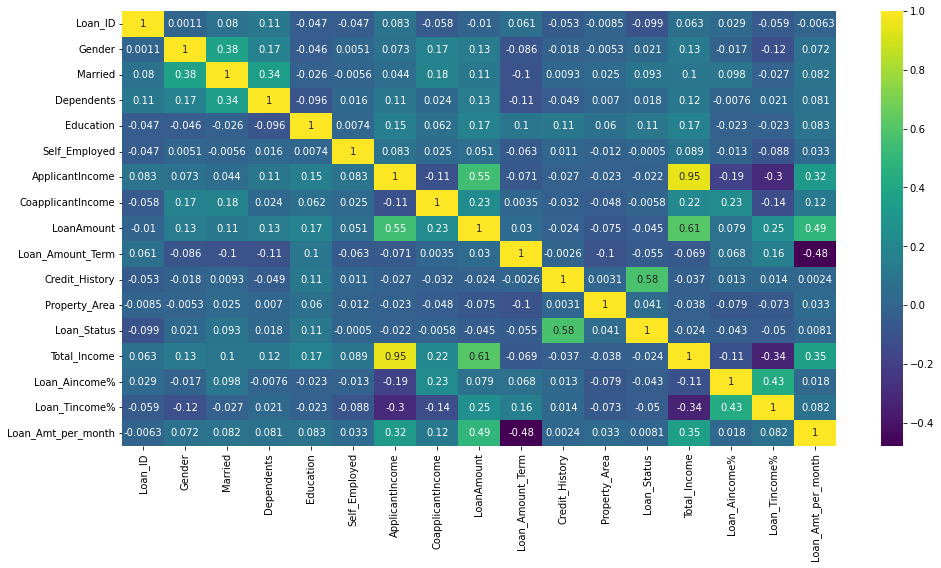

In [125]:
# Checking co-relation of variables

plt.figure(figsize = (16,8))
correlation = loan_data.corr().round(4)
sns.heatmap(correlation, annot = True, cmap = "viridis")
plt.show()

From above co-relation heat map, it is clear that only total income is strongly correlated to applicant income as the prior is derived from the applicant income. Therefore we can drop any one of the attribute

## Test Train Split

In [126]:
# Importing test vtrain split library

from sklearn.model_selection import train_test_split

In [127]:
# Independent and Dependent Variables split without dropping attributes

X = loan_data.drop(columns= "Loan_Status", axis = 1)
y = loan_data["Loan_Status"]

In [128]:
# Independent and dependent attributes by dropping non necessary columns

X_new = loan_data.drop(columns = ["Loan_ID", 
                       "Gender", 
                       "Married", 
                       "Dependents", 
                       "Self_Employed", 
                       "Loan_Status", 
                       "Total_Income",
                        "Loan_Aincome%"
                                 ], axis = 1)

In [129]:
Y_new = loan_data["Loan_Status"]

In [130]:
# X overview

X.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Aincome%,Loan_Tincome%,Loan_Amt_per_month
0,294853,1,0,0.0,1,0,1316025,0.0,250000,360.0,1.0,2,1316025.0,19.00,19.00,694.44
1,162883,1,1,1.0,1,0,1031175,339300.0,256000,360.0,1.0,0,1370475.0,24.83,18.68,711.11
2,620668,1,1,0.0,1,1,675000,0.0,132000,360.0,1.0,2,675000.0,19.56,19.56,366.67
3,295747,1,1,0.0,0,0,581175,530550.0,240000,360.0,1.0,2,1111725.0,41.30,21.59,666.67
4,133390,1,0,0.0,1,0,1350000,0.0,282000,360.0,1.0,2,1350000.0,20.89,20.89,783.33


In [131]:
# X_new overview

X_new.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Tincome%,Loan_Amt_per_month
0,1,1316025,0.0,250000,360.0,1.0,2,19.00,694.44
1,1,1031175,339300.0,256000,360.0,1.0,0,18.68,711.11
2,1,675000,0.0,132000,360.0,1.0,2,19.56,366.67
3,0,581175,530550.0,240000,360.0,1.0,2,21.59,666.67
4,1,1350000,0.0,282000,360.0,1.0,2,20.89,783.33


In [132]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           521 non-null    int64  
 1   ApplicantIncome     521 non-null    int64  
 2   CoapplicantIncome   521 non-null    float64
 3   LoanAmount          521 non-null    int64  
 4   Loan_Amount_Term    521 non-null    float64
 5   Credit_History      521 non-null    float64
 6   Property_Area       521 non-null    int32  
 7   Loan_Tincome%       521 non-null    float64
 8   Loan_Amt_per_month  521 non-null    float64
dtypes: float64(5), int32(1), int64(3)
memory usage: 34.7 KB


## Data Scaling

In [133]:
# Importing library for data scaling

from sklearn.preprocessing import StandardScaler

In [134]:
# Assigning Standard Scaler to a variable
std = StandardScaler()

In [135]:
# Fitting and transorming training dataset

X_final = std.fit_transform(X_new)
y_final = Y_new

## Train Test Split

In [136]:
# Importing necessary library

from sklearn.model_selection import train_test_split

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size= 0.3, random_state= 23)

## Oversampling of Minority Class 

C:\Users\srini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


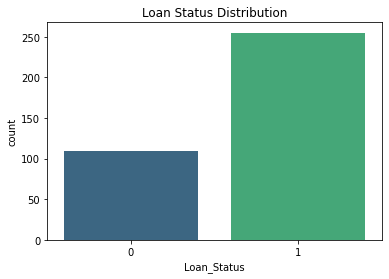

In [138]:
# Checking Distribution of target variable

sns.countplot(y_train, palette= 'viridis')
plt.title("Loan Status Distribution")
plt.show()

Since class 1 is grater than class 0, this is an imbalanced dataset. Model built on this imbalanced dataset might not learn the generalized patterns which causes overfitting. 

Therefore, SMOTE (Synthetic Minority Class Oversampling technique) to be used to balance both the classes which inturn generalizes the models built on this dataset

In [139]:
# Importing library for SMOTE

# from imblearn.over_sampling import SMOTE

In [140]:
# Assigning SMOTE to a variable

# sm = SMOTE(random_state= 12)

In [141]:
X_train_os, y_train_os = (X_train, y_train)

In [142]:
print("Before Oversampling, total count of label '1' : {}".format(sum(y_train==1)))
print("Before Oversampling, total count of label '0' : {}".format(sum(y_train==0)))

print("After Oversamplling, shape of X_train : {}".format(X_train_os.shape))
print("After Oversamplling, shape of y_train : {}".format(y_train_os.shape))

print("After Oversampling, total count of label '1' : {}".format(sum(y_train_os==1)))
print("After Oversampling, total count of label '0' : {}".format(sum(y_train_os==0)))

Before Oversampling, total count of label '1' : 255
Before Oversampling, total count of label '0' : 109
After Oversamplling, shape of X_train : (364, 9)
After Oversamplling, shape of y_train : (364,)
After Oversampling, total count of label '1' : 255
After Oversampling, total count of label '0' : 109


Above output clearly indicates that now both the classes have same number of records. 

# MODEL BUILDING

The following models shall be built on the dataset

1. Decision Tree Classifier
2. Random Forest Classifier
3. Adaboot Classifier
4. KNN Classifier
5. Gradient Boost Classifier
6. XG Boost Classifier

In [143]:
# Importing Model building libraries 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Importing metrics check libraries

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Importing hperparameter tuning libraries

from sklearn.model_selection import GridSearchCV

## Decision Tree Classifier

In [144]:
# Assigning model to a variable

model1_dt = DecisionTreeClassifier(criterion= "gini", min_samples_split= 5, random_state= 24,)

In [145]:
# Model Fitting

model1_dt.fit(X_train_os, y_train_os)

DecisionTreeClassifier(min_samples_split=5, random_state=24)

In [146]:
# Model Prediction

y_pred_dt = model1_dt.predict(X_test)

In [147]:
# Checking Accuracy Score

accuracy_score_dt = accuracy_score(y_pred_dt, y_test)
print("The accuracy score is:", round(accuracy_score_dt*100,2))

The accuracy score is: 75.8


In [148]:
# Checking Confusion Matrix

confusion_matrix_dt = confusion_matrix(y_pred_dt, y_test)
print("The confusion matrix is:\n", confusion_matrix_dt)

The confusion matrix is:
 [[36 20]
 [18 83]]


In [149]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_dt = precision_score(y_pred_dt, y_test)
recall_dt = recall_score(y_pred_dt, y_test)
f1_dt = f1_score(y_pred_dt, y_test)

print("The precision score is:",round(precision_dt*100,2),"\n The recall score is:", round(recall_dt*100,2),
      "\n F1 Score is:", round(f1_dt*100,2))

The precision score is: 80.58 
 The recall score is: 82.18 
 F1 Score is: 81.37


## Hyperparameter Tuning

In [150]:
parameters_dt = {"criterion" : ["gini", "entropy" ], 
                 "max_depth" : [2,3,4,5,7,8,12,15],
                "min_samples_split" : [2,3,4,5,6,8]}

In [151]:
# Assigning Gridsearch to a variable

gcv_dt = GridSearchCV(model1_dt, parameters_dt, scoring="precision", cv = 5)

In [152]:
# Fitting model for hyperparameter tuning

gcv_dt.fit(X_train_os, y_train_os)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(min_samples_split=5,
                                              random_state=24),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 8, 12, 15],
                         'min_samples_split': [2, 3, 4, 5, 6, 8]},
             scoring='precision')

In [153]:
# Checking for best parameters

gcv_dt.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 6}

## Building Decision Tree Model on the Parameters from Hyperparameter Tuning

In [154]:
# Assigning model to a variable with best parameters

model1_dth = DecisionTreeClassifier(criterion="gini", max_depth=12, min_samples_split=6, random_state=24)

In [155]:
# Fitting the model

model1_dth.fit(X_train_os, y_train_os)

DecisionTreeClassifier(max_depth=12, min_samples_split=6, random_state=24)

In [156]:
# Model prediction

y_pred_dth = model1_dth.predict(X_test)

In [157]:
# Checking Accuracy Score

accuracy_score_dth = accuracy_score(y_pred_dth, y_test)
print("The accuracy score is:", round(accuracy_score_dth*100,2))

The accuracy score is: 74.52


In [158]:
# Checking Confusion Matrix

confusion_matrix_dth = confusion_matrix(y_pred_dth, y_test)
print("The confusion matrix is:\n", confusion_matrix_dth)

The confusion matrix is:
 [[34 20]
 [20 83]]


In [159]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_dth = precision_score(y_pred_dth, y_test)
recall_dth = recall_score(y_pred_dth, y_test)
f1_dth = f1_score(y_pred_dth, y_test)

print("The precision score is:",round(precision_dth*100,2),"\n The recall score is:", round(recall_dth*100,2),
     "\n F1 Score is:", round(f1_dth*100,2))

The precision score is: 80.58 
 The recall score is: 80.58 
 F1 Score is: 80.58


## Random Forest Classifier

In [160]:
# Assigning Model to a Variable

model2_rf = RandomForestClassifier(n_estimators= 100, 
                                   criterion= "gini", 
                                   max_depth= 6, 
                                   min_samples_split= 4, 
                                   random_state= 45)

In [161]:
# Model Fitting

model2_rf.fit(X_train_os, y_train_os)

RandomForestClassifier(max_depth=6, min_samples_split=4, random_state=45)

In [162]:
# Model Prediction

y_pred_rf = model2_rf.predict(X_test)

In [163]:
# Checking Accuracy Score

accuracy_score_rf = accuracy_score(y_pred_rf, y_test)
print("The accuracy score is:", round(accuracy_score_rf*100,2))

The accuracy score is: 82.17


In [164]:
# Checking Confusion Matrix

confusion_matrix_rf = confusion_matrix(y_pred_rf, y_test)
print("The confusion matrix is:\n", confusion_matrix_rf)

The confusion matrix is:
 [[30  4]
 [24 99]]


In [165]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_rf = precision_score(y_pred_rf, y_test)
recall_rf = recall_score(y_pred_rf, y_test)
f1_rf = f1_score(y_pred_rf, y_test)

print("The precision score is:",round(precision_rf*100,2),"\n The recall score is:", round(recall_rf*100,2),
     "\n F1 Score is:", round(f1_rf*100,2))

The precision score is: 96.12 
 The recall score is: 80.49 
 F1 Score is: 87.61


### Hyperparameter Tuning

In [166]:
parameters_rf = {"n_estimators" : [100,150,200,300],
                 "criterion" : ["gini", "entropy" ], 
                 "max_depth" : [2,3,4,5,7,8,12,15],
                "min_samples_split" : [2,3,4,5,6,8]}

In [167]:
# Assigning Gridsearch to a variable

gcv_rf = GridSearchCV(model2_rf, parameters_rf, scoring="precision", cv = 5)

In [168]:
# gcv_rf.fit(X_train_os, y_train_os)

In [169]:
# Checking for best parameters

# gcv_rf.best_params_

## Building Random Forest Classifier on the Parameters from Hyperparameter Tuning

In [170]:
# Assigning Model to a Variable

model2_rfh = RandomForestClassifier(n_estimators= 100, 
                                   criterion= "gini", 
                                   max_depth= 15, 
                                   min_samples_split= 8, 
                                   random_state= 45)

In [171]:
# Model Fitting

model2_rfh.fit(X_train_os, y_train_os)

RandomForestClassifier(max_depth=15, min_samples_split=8, random_state=45)

In [172]:
# Model Prediction

y_pred_rfh = model2_rfh.predict(X_test)

In [173]:
# Checking Accuracy Score

accuracy_score_rfh = accuracy_score(y_pred_rfh, y_test)
print("The accuracy score is:", round(accuracy_score_rfh*100,2))

The accuracy score is: 81.53


In [174]:
# Checking Confusion Matrix

confusion_matrix_rfh = confusion_matrix(y_pred_rfh, y_test)
print("The confusion matrix is:\n", confusion_matrix_rfh)

The confusion matrix is:
 [[31  6]
 [23 97]]


In [175]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_rfh = precision_score(y_pred_rfh, y_test)
recall_rfh = recall_score(y_pred_rfh, y_test)
f1_rfh = f1_score(y_pred_rfh, y_test)

print("The precision score is:",round(precision_rfh*100,2),"\n The recall score is:", round(recall_rfh*100,2),
     "\n F1 Score is:", round(f1_rfh*100,2))

The precision score is: 94.17 
 The recall score is: 80.83 
 F1 Score is: 87.0


## KNN Classifier

In [176]:
# Assigning Model to a Variable

model3_knn = KNeighborsClassifier(n_neighbors = 4)

In [177]:
# Model Fitting

model3_knn.fit(X_train_os, y_train_os)

KNeighborsClassifier(n_neighbors=4)

In [178]:
# Model Prediction'

y_pred_knn = model3_knn.predict(X_test)

In [179]:
# Checking Accuracy Score

accuracy_score_knn = accuracy_score(y_pred_knn, y_test)
print("The accuracy score is:", round(accuracy_score_knn*100,2))

The accuracy score is: 77.07


In [180]:
# Checking Confusion Matrix

confusion_matrix_knn = confusion_matrix(y_pred_knn, y_test)
print("The confusion matrix is:\n", confusion_matrix_knn)

The confusion matrix is:
 [[32 14]
 [22 89]]


In [181]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_knn = precision_score(y_pred_knn, y_test)
recall_knn = recall_score(y_pred_knn, y_test)
f1_knn = f1_score(y_pred_knn, y_test)

print("The precision score is:",round(precision_knn*100,2),"\n The recall score is:", round(recall_knn*100,2),
     "\n F1 Score is:", round(f1_knn*100,2))

The precision score is: 86.41 
 The recall score is: 80.18 
 F1 Score is: 83.18


### Hyperparameter Tuning

In [182]:
parameters_knn = {"n_neighbors" : [3,5,7,9,11,13,15],
                 "metric" : ["euclidean", "manhattan", "cosine"]}

In [183]:
# Assigning Gridsearch to a variable

gcv_knn = GridSearchCV(model3_knn, parameters_knn, scoring="precision", cv = 5)

In [184]:
# Fitting model for hyperparameter tuning

gcv_knn.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=4),
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='precision')

In [185]:
# Checking for best parameters

gcv_knn.best_params_

{'metric': 'cosine', 'n_neighbors': 11}

In [186]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_os, y_train_os)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

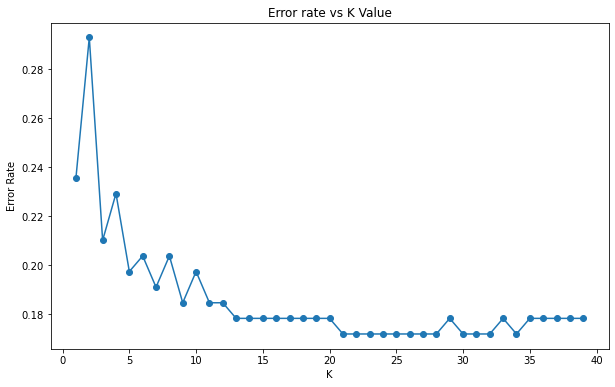

In [187]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, marker = 'o')
plt.title("Error rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

K = 11 is considered due to the presence of elbow 

## Building KNN Classifier on the Parameters from Hyperparameter Tuning

In [188]:
# Assigning Model to a Variable

model3_knnh = KNeighborsClassifier(n_neighbors = 11, metric="cosine")

In [189]:
# Model Fitting

model3_knnh.fit(X_train_os, y_train_os)

KNeighborsClassifier(metric='cosine', n_neighbors=11)

In [190]:
# Model Prediction'

y_pred_knnh = model3_knnh.predict(X_test)

In [191]:
# Checking Accuracy Score

accuracy_score_knnh = accuracy_score(y_pred_knnh, y_test)
print("The accuracy score is:", round(accuracy_score_knnh*100,2))

The accuracy score is: 80.25


In [192]:
# Checking Confusion Matrix

confusion_matrix_knnh = confusion_matrix(y_pred_knnh, y_test)
print("The confusion matrix is:\n", confusion_matrix_knnh)

The confusion matrix is:
 [[28  5]
 [26 98]]


In [193]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_knnh = precision_score(y_pred_knnh, y_test)
recall_knnh = recall_score(y_pred_knnh, y_test)
f1_knnh = f1_score(y_pred_knnh, y_test)

print("The precision score is:",round(precision_knnh*100,2),"\n The recall score is:", round(recall_knnh*100,2),
     "\n F1 Score is:", round(f1_knnh*100,2))

The precision score is: 95.15 
 The recall score is: 79.03 
 F1 Score is: 86.34


## Adaboost Classifier

In [194]:
# Assigning model to a variable

model4_ab = AdaBoostClassifier(n_estimators = 100, learning_rate= 0.1)

In [195]:
# Model fitting

model4_ab.fit(X_train_os, y_train_os)

AdaBoostClassifier(learning_rate=0.1, n_estimators=100)

In [196]:
# Model Prediction

y_pred_ab = model4_ab.predict(X_test)

In [197]:
# Checking Accuracy Score

accuracy_score_ab = accuracy_score(y_pred_ab, y_test)
print("The accuracy score is:", round(accuracy_score_ab*100,2))

The accuracy score is: 82.8


In [198]:
# Checking Confusion Matrix

confusion_matrix_ab = confusion_matrix(y_pred_ab, y_test)
print("The confusion matrix is:\n", confusion_matrix_ab)

The confusion matrix is:
 [[ 30   3]
 [ 24 100]]


In [199]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_ab = precision_score(y_pred_ab, y_test)
recall_ab = recall_score(y_pred_ab, y_test)
f1_ab = f1_score(y_pred_ab, y_test)

print("The precision score is:",round(precision_ab*100,2),"\n The recall score is:", round(recall_ab*100,2),
     "\n F1 Score is:", round(f1_ab*100,2))

The precision score is: 97.09 
 The recall score is: 80.65 
 F1 Score is: 88.11


### Hyperparameter Tuning

In [200]:
# Defining Parameters

parameters_ab = {"n_estimators" : [50,100,150,200,250,300],
                "learning_rate" : [0.01, 0.05, 0.1, 0.3, 0.5]}

In [201]:
# Assigning Gridsearch to a variable

gcv_ab = GridSearchCV(model4_ab, parameters_ab, scoring="precision", cv = 5)

In [202]:
# Fitting model for hyperparameter tuning

# gcv_ab.fit(X_train_os, y_train_os)

In [203]:
# Checking for best parameters

# gcv_ab.best_params_

## Building Adaboost Classifier on the Parameters from Hyperparameter Tuning

In [204]:
# Assigning model to a variable

model4_abh = AdaBoostClassifier(n_estimators = 300, learning_rate= 0.3)

In [205]:
# Model fitting

model4_abh.fit(X_train_os, y_train_os)

AdaBoostClassifier(learning_rate=0.3, n_estimators=300)

In [206]:
# Model Prediction

y_pred_abh = model4_abh.predict(X_test)

In [207]:
# Checking Accuracy Score

accuracy_score_abh = accuracy_score(y_pred_abh, y_test)
print("The accuracy score is:", round(accuracy_score_abh*100,2))

The accuracy score is: 78.98


In [208]:
# Checking Confusion Matrix

confusion_matrix_abh = confusion_matrix(y_pred_abh, y_test)
print("The confusion matrix is:\n", confusion_matrix_abh)

The confusion matrix is:
 [[32 11]
 [22 92]]


In [209]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_abh = precision_score(y_pred_abh, y_test)
recall_abh = recall_score(y_pred_abh, y_test)
f1_abh = f1_score(y_pred_abh, y_test)

print("The precision score is:",round(precision_abh*100,2),"\n The recall score is:", round(recall_abh*100,2),
     "\n F1 Score is:", round(f1_abh*100,2))

The precision score is: 89.32 
 The recall score is: 80.7 
 F1 Score is: 84.79


## Gradient Boost Classifier

In [210]:
# Assigning model to a variable

model5_gb = GradientBoostingClassifier(loss= "log_loss",
                                       learning_rate= 0.1, 
                                       n_estimators= 100, 
                                      min_samples_split= 6,
                                      max_depth= 4,
                                      criterion= "friedman_mse",
                                      random_state= 22)

In [211]:
# Model fitting

model5_gb.fit(X_train_os, y_train_os)

GradientBoostingClassifier(max_depth=4, min_samples_split=6, random_state=22)

In [212]:
# Model Prediction

y_pred_gb = model5_gb.predict(X_test)

In [213]:
# Checking Accuracy Score

accuracy_score_gb = accuracy_score(y_pred_gb, y_test)
print("The accuracy score is:", round(accuracy_score_gb*100,2))

The accuracy score is: 79.62


In [214]:
# Checking Confusion Matrix

confusion_matrix_gb = confusion_matrix(y_pred_gb, y_test)
print("The confusion matrix is:\n", confusion_matrix_gb)

The confusion matrix is:
 [[33 11]
 [21 92]]


In [215]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_gb = precision_score(y_pred_gb, y_test)
recall_gb = recall_score(y_pred_gb, y_test)
f1_gb = f1_score(y_pred_gb, y_test)

print("The precision score is:",round(precision_gb*100,2),"\n The recall score is:", round(recall_gb*100,2),
     "\n F1 Score is:", round(f1_gb*100,2))

The precision score is: 89.32 
 The recall score is: 81.42 
 F1 Score is: 85.19


### Hyperparameter Tuning

In [216]:
# Defining Parameters

parameters_gb = {"loss" : ["log_loss", "exponential"],
                "learning_rate" : [0.05, 0.1, 0.5],
                "n_estimators" : [100,200,300],
                "min_samples_split" : [2,3,4,6,8],
                "max_depth" : [3,4,5,6,7]}

In [217]:
# Assigning Gridsearch to a variable

gcv_gb = GridSearchCV(model5_gb, parameters_gb, scoring="precision", cv = 5)

In [218]:
# Fitting model for hyperparameter tuning

# gcv_gb.fit(X_train_os, y_train_os)

In [219]:
# Checking for best parameters

# gcv_gb.best_params_

## Building Gradient Boost Classifier on the Parameters from Hyperparameter Tuning¶

In [220]:
model5_gbh = GradientBoostingClassifier(loss= "exponential",
                                       learning_rate= 0.1, 
                                       n_estimators= 100, 
                                      min_samples_split= 2,
                                      max_depth= 7,
                                      random_state= 22)

In [221]:
# Model fitting

model5_gbh.fit(X_train_os, y_train_os)

GradientBoostingClassifier(loss='exponential', max_depth=7, random_state=22)

In [222]:
# Model Prediction

y_pred_gbh = model5_gbh.predict(X_test)

In [223]:
# Checking Accuracy Score

accuracy_score_gbh = accuracy_score(y_pred_gbh, y_test)
print("The accuracy score is:", round(accuracy_score_gbh*100,2))

The accuracy score is: 80.25


In [224]:
# Checking Confusion Matrix

confusion_matrix_gbh = confusion_matrix(y_pred_gbh, y_test)
print("The confusion matrix is:\n", confusion_matrix_gbh)

The confusion matrix is:
 [[33 10]
 [21 93]]


In [225]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_gbh = precision_score(y_pred_gbh, y_test)
recall_gbh = recall_score(y_pred_gbh, y_test)
f1_gbh = f1_score(y_pred_gbh, y_test)

print("The precision score is:",round(precision_gbh*100,2),"\n The recall score is:", round(recall_gbh*100,2),
     "\n F1 Score is:", round(f1_gbh*100,2))

The precision score is: 90.29 
 The recall score is: 81.58 
 F1 Score is: 85.71


## XG Boost Classifier

In [226]:
# Assigning model to a variable

model6_xgb = XGBClassifier(max_depth = 36, 
                          learning_rate = 0.01, 
                          n_estimators = 1000, 
                          random_state = 32, 
                          eval_metric = "rmse")

In [227]:
# Model Training

model6_xgb.fit(X_train_os, y_train_os)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=32, ...)

In [228]:
# Model Prediction

y_pred_xgb = model6_xgb.predict(X_test)

In [229]:
# Checking Accuracy Score

accuracy_score_xgb = accuracy_score(y_pred_xgb, y_test)
print("The accuracy score is:", round(accuracy_score_xgb*100,2))

The accuracy score is: 82.8


In [230]:
# Checking Confusion Matrix

confusion_matrix_xgb = confusion_matrix(y_pred_xgb, y_test)
print("The confusion matrix is:\n", confusion_matrix_xgb)

The confusion matrix is:
 [[37 10]
 [17 93]]


In [231]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_xgb = precision_score(y_pred_xgb, y_test)
recall_xgb = recall_score(y_pred_xgb, y_test)
f1_xgb = f1_score(y_pred_xgb, y_test)

print("The precision score is:",round(precision_xgb*100,2),"\n The recall score is:", round(recall_xgb*100,2),
     "\n F1 Score is:", round(f1_xgb*100,2))

The precision score is: 90.29 
 The recall score is: 84.55 
 F1 Score is: 87.32


### Hyperparameter Tuning

In [232]:
# Defining Parameters

parameters_xgb = {"learning_rate" : [0.05, 0.1, 0.5],
                "n_estimators" : [100,200,300, 1000],
                "eval_metric" : ["rmse", "logloss","mae"],
                "max_depth" : [5,7,10,15,25],
                 "booster" : ["gbtree", "gblinear"]}

In [233]:
# Assigning Gridsearch to a variable

gcv_xgb = GridSearchCV(model6_xgb, parameters_xgb, scoring="precision", cv = 3)

In [234]:
# Fitting model for hyperparameter tuning

# gcv_xgb.fit(X_train_os, y_train_os)

In [235]:
# Checking for best parameters

# gcv_xgb.best_params_

## Building Xtreme Gradient Boost Classifier on the Parameters from Hyperparameter Tuning

In [236]:
# Assigning model to a variable

model6_xgbh = XGBClassifier(booster = "gbtree",
                           max_depth = 7, 
                          learning_rate = 0.5, 
                          n_estimators = 200, 
                          random_state = 32, 
                          eval_metric = "rmse")

In [237]:
# Model Training

model6_xgbh.fit(X_train_os, y_train_os)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='rmse', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=32, ...)

In [238]:
# Model Prediction

y_pred_xgbh = model6_xgbh.predict(X_test)

In [239]:
# Checking Accuracy Score

accuracy_score_xgbh = accuracy_score(y_pred_xgbh, y_test)
print("The accuracy score is:", round(accuracy_score_xgbh*100,2))

The accuracy score is: 79.62


In [240]:
# Checking Confusion Matrix

confusion_matrix_xgbh = confusion_matrix(y_pred_xgbh, y_test)
print("The confusion matrix is:\n", confusion_matrix_xgbh)

The confusion matrix is:
 [[36 14]
 [18 89]]


In [241]:
# Compute precision and recall

# In the current scenario, presision is more important than precision. 
# Precision = TP / (TP+FP) -- An non eligible applicant is classified as eligible for loans 
# Recall = TP / (TP+FN) -- An eligible applicant is classified as not eligible for loans
# A eligible applicant classified as non eligible has less adverse affect than viceversa therefore precision is pivotal

precision_xgbh = precision_score(y_pred_xgbh, y_test)
recall_xgbh = recall_score(y_pred_xgbh, y_test)
f1_xgbh = f1_score(y_pred_xgbh, y_test)

print("The precision score is:",round(precision_xgbh*100,2),"\n The recall score is:", round(recall_xgbh*100,2),
     "\n F1 Score is:", round(f1_xgbh*100,2))

The precision score is: 86.41 
 The recall score is: 83.18 
 F1 Score is: 84.76


## Conclusion

After building 6 different Classification models, the following are the Accuracies, Precision and F1 Scores of the models.

Evaluation Metrics such as accuracy, precision, recall and f1 score is used for evaluating models built

Accuracy - Measure of all the correctly identified cases
    = (TP+TN)/(TP+FP+TN+FN)

Precision - Measure of correctly classified cases out of total positive cases predicted
    = TP/(TP+FP)

Recall - Measure of correctly classified cases out of total correct cases present in the dataset
    =TP/(TP+FN)
    
F1 Score - It is the harmonic mean of precision and recall. F1 score is a better measure for incorrectly classified classes. Also, F1 score is a good measure for imbalanced classes

#### Model - Decision Tree


Accuracy = 75.80%
Precision = 80.58%
F1 Score = 81.37%


After Hyperparameter Tuning

Accuracy = 74.52%
Precision = 80.58%
F1 Score = 80.58%

#### Model - Random Forest

Accuracy = 82.17%
Precision = 96.12%
F1 Score = 87.61%

After Hyperparameter Tuning

Accuracy = 81.53%
Precision = 94.17%
F1 Score = 87.00%

#### Model - KNN

Accuracy = 77.07%
Precision = 86.41%
F1 Score = 83.18%

After Hyperparameter Tuning

Accuracy = 80.25%
Precision = 95.15%
F1 Score = 86.34%

#### Model - Adaboost

Accuracy = 82.80%
Precision = 97.09%
F1 Score = 88.11%

After Hyperparameter Tuning

Accuracy = 78.98%
Precision = 89.32%
F1 Score = 84.79%

#### Model - Gradient Boost

Accuracy = 79.62%
Precision = 89.32%
F1 Score = 85.19%

After Hyperparameter Tuning

Accuracy = 80.25%
Precision = 90.29%
F1 Score = 85.71%

#### Model - XG Boost

Accuracy = 82.80%
Precision = 90.29%
F1 Score = 87.32%

After Hyperparameter Tuning

Accuracy = 79.62%
Precision = 86.41%
F1 Score = 84.76%

#### The best 4 models are 

1. KNN Classifier

    Precision = 95.15%    
    F1 Score = 86.34%
    

2. Random Forest Classifier
    
    Precision = 94.17%    
    F1 Score = 87.00%
    
    
3. Gradient Boost Classifier
    
    Precision = 90.29%    
    F1 Score = 85.71%
    
    
4. Adaboost Classifier
    
    Precision = 89.32%    
    F1 Score = 84.79%
    
    
    
Evaluation metrics of precision and f1 score shall be pivotal for this models.

As clarified above, precision will assist in finding out the false positive case. For instance, an applicant classified as eligible for loans when he is not eligible will cause adverse effect and may lead to default of loan than the viceversa case. Therefore, the above models are built with the intension to imrove the precision and therby helping the organization to not misclassify non eligible applicants.

Further, F1 score indicates the overall accuracy of the imbalnced dataset. As our dataset is imbalanced in nature, F1 score shall be the metric to check the overall accuracy of the model.
    
KNN & Random Forest Classifier with approx. 95% precision score and 87% F1 score stand the best model for this dataset. However, the evaluation metrics might be imporved on a larger dataset

# Test Dataset

In [242]:
# Reading Test Dataset

path_test = "C:/Users/srini/Skillslash/Live Project 1/consumer creditworthiness test data.xlsx"

loan_test = pd.read_excel(path_test)

In [243]:
# Overview of dataset

loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural


In [244]:
# General information

loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            93 non-null     int64  
 1   Gender             90 non-null     object 
 2   Married            93 non-null     object 
 3   Dependents         91 non-null     object 
 4   Education          93 non-null     object 
 5   Self_Employed      88 non-null     object 
 6   ApplicantIncome    93 non-null     int64  
 7   CoapplicantIncome  93 non-null     int64  
 8   LoanAmount         93 non-null     int64  
 9   Loan_Amount_Term   93 non-null     int64  
 10  Credit_History     86 non-null     float64
 11  Property_Area      93 non-null     object 
dtypes: float64(1), int64(5), object(6)
memory usage: 8.8+ KB


Observations
There are total of 93 records and 12 attributes
6 of 12 attributes are object type
There are few null values across many attributes which shall be explored in the following stages

In [245]:
# Checking for the percentage of null values in the test data

'''
In the below code snippet, total null values of respective attributes are summed up and these values
are divided with the total number of records in the Loan data. Loan ID attribute is considered for 
determining total number of records since
1. Loan ID doesn't contain null values
2. Loan ID is the unique identification number which is the primary key for this dataset
'''

round((loan_test.isnull().sum()/loan_test["Loan_ID"].count())*100,2)


Loan_ID              0.00
Gender               3.23
Married              0.00
Dependents           2.15
Education            0.00
Self_Employed        5.38
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       7.53
Property_Area        0.00
dtype: float64

### Observations

1. 4 attributes contain null values
2. Credit_History column has highest percentage of null values at 7.53% follwed by self_Employed and Gender columns
3. 8 out of 12 attributes does not contain any null values

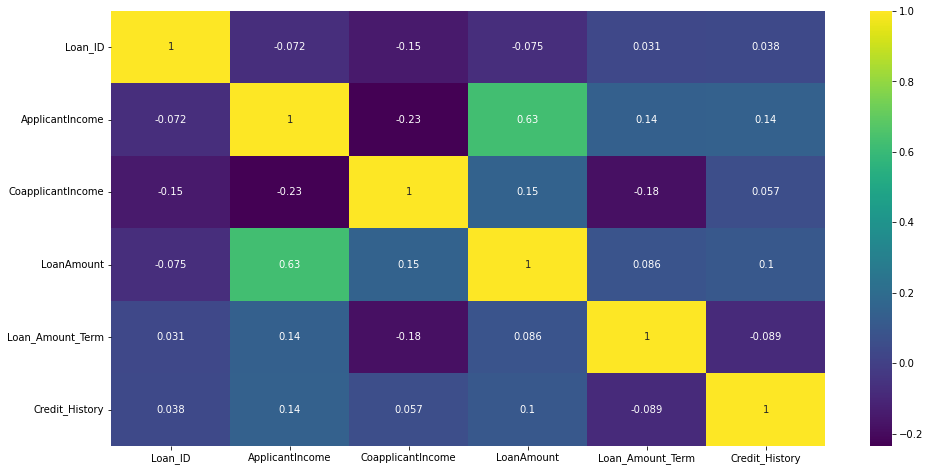

In [246]:
# Checking correlation of test data

plt.figure(figsize = (16,8))
correlation_test = loan_test.corr().round(4)
sns.heatmap(correlation_test, annot = True, cmap = "viridis")
plt.show()

From above it is clear that all are independent attributes

## Missing Value Treatment

In [247]:
# Checking null value percentage in each attribute

round((loan_test.isnull().sum()/loan_test["Education"].count())*100,2)

Loan_ID              0.00
Gender               3.23
Married              0.00
Dependents           2.15
Education            0.00
Self_Employed        5.38
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       7.53
Property_Area        0.00
dtype: float64

The attribute "Credit_History" only has the missing values

### Credit History

In [248]:
# Checking Basic Information 

print("Total number of null records are:", loan_test["Credit_History"].isnull().sum())

print("Unique Values are:",loan_test["Credit_History"].unique())

Total number of null records are: 7
Unique Values are: [ 1.  0. nan]


In [249]:
# Checking the record of missing values

loan_test.loc[loan_test["Credit_History"].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
9,955938,Male,Yes,0,Graduate,No,230625,1237500,432000,360,NaN,Rural
12,963672,Male,No,1,Graduate,No,2531250,0,392000,360,NaN,Semiurban
23,859361,Female,Yes,0,Not Graduate,No,678825,149175,204000,360,NaN,Semiurban
35,980813,Female,No,0,Graduate,No,600075,365625,168000,360,NaN,Urban
44,617594,Male,Yes,0,Not Graduate,No,1005075,0,240000,360,NaN,Rural
62,329130,Male,Yes,1,Graduate,No,423000,0,122000,360,NaN,Rural
79,153131,Female,No,3+,Graduate,NaN,93600,9375075,700000,180,NaN,Urban


In [250]:
# Checking the mode value for missing value imputation

loan_test["Credit_History"].mode()

0    1.0
Name: Credit_History, dtype: float64

In [251]:
# Imputation of Missing Value with mode value

loan_test["Credit_History"].fillna(1, inplace = True)

In [252]:
# Checking number of null values after imputation

print("Total number of null records are:", loan_test["Credit_History"].isnull().sum())

Total number of null records are: 0


In [253]:
# Checking null values after treating missing values

round((loan_test.isnull().sum()/loan_test["Education"].count())*100,2)

Loan_ID              0.00
Gender               3.23
Married              0.00
Dependents           2.15
Education            0.00
Self_Employed        5.38
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           0.00
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
dtype: float64

There are no missing values in the test data

## Feature Engineering

In [254]:
# Creating new attribute

loan_test["Total_Income"] = loan_test["ApplicantIncome"] + loan_test["CoapplicantIncome"]

In [255]:
# Overview of dataset

loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban,562500
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural,1597725
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural,3400650
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban,1522575
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural,3937500


Text(0.5, 1.0, 'Total Income Distribution')

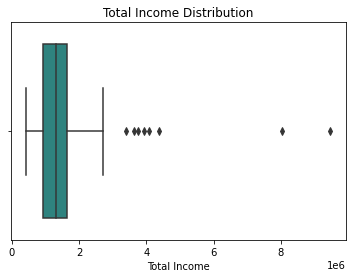

In [256]:
# Box Plot for confirming our analysis

sns.boxplot(data = loan_test, x= "Total_Income", palette="viridis")
plt.xlabel("Total Income")
plt.title("Total Income Distribution")

## Loan Percentage with respect to total income


This suggests percentage of loan amount requested by the applicant to his Total income. Further this help further to undestand loan percentage on loan eligibility.

In [257]:
# Creating new attribute

loan_test["Loan_Tincome%"] = round((loan_test["LoanAmount"]/loan_test["Total_Income"])*100,2)

In [258]:
# Overview of dataset

loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban,562500,19.56
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural,1597725,12.52
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural,3400650,28.23
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban,1522575,0.00
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural,3937500,20.32


C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


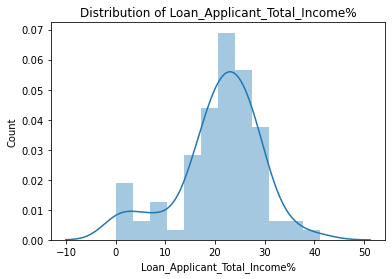

In [259]:
# Univariate Analysis

sns.distplot(x = loan_test["Loan_Tincome%"], kde=True)
plt.title("Distribution of Loan_Applicant_Total_Income%")
plt.xlabel("Loan_Applicant_Total_Income%")
plt.ylabel("Count")
plt.show()

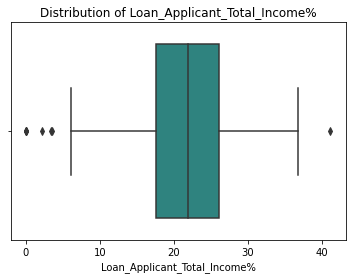

In [260]:
# Box Plot

sns.boxplot(data = loan_test, x= "Loan_Tincome%", palette="viridis")
plt.xlabel("Loan_Applicant_Total_Income%")
plt.title("Distribution of Loan_Applicant_Total_Income%")
plt.show()

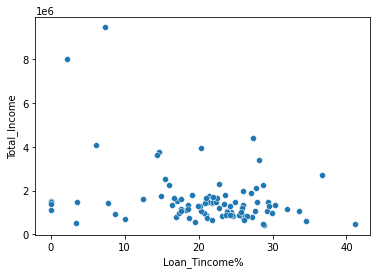

In [261]:
# Bivariate Analysis of Loan to Applicant Income % and Total Income

sns.scatterplot(data=loan_test, x="Loan_Tincome%", y="Total_Income", palette="viridis")
plt.show()

## Loan Amount Per Month

Indicates the loan amount due every month for the loan amount term period

In [262]:
# Creating new attribute

loan_test["Loan_Amt_per_month"] = round(loan_data["LoanAmount"]/loan_data["Loan_Amount_Term"],2)

In [263]:
# Overview of dataset

loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%,Loan_Amt_per_month
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban,562500,19.56,694.44
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural,1597725,12.52,711.11
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural,3400650,28.23,366.67
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban,1522575,0.00,666.67
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural,3937500,20.32,783.33


C:\Users\srini\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


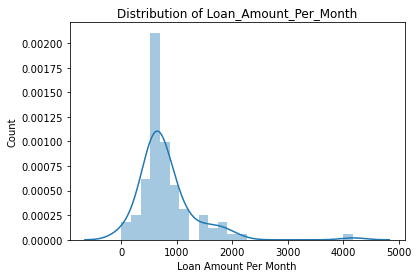

In [264]:
# Univariate Analysis

sns.distplot(x = loan_test["Loan_Amt_per_month"], kde=True)
plt.title("Distribution of Loan_Amount_Per_Month")
plt.xlabel("Loan Amount Per Month")
plt.ylabel("Count")
plt.show()

In [265]:
# Final Overview of dataset

loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%,Loan_Amt_per_month
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban,562500,19.56,694.44
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural,1597725,12.52,711.11
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural,3400650,28.23,366.67
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban,1522575,0.00,666.67
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural,3937500,20.32,783.33


In [266]:
# Resetting Index of dataset

loan_test.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%,Loan_Amt_per_month
0,0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban,562500,19.56,694.44
1,1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural,1597725,12.52,711.11
2,2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural,3400650,28.23,366.67
3,3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban,1522575,0.00,666.67
4,4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural,3937500,20.32,783.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,88,745846,Female,No,0,Graduate,No,652500,0,142000,360,1.0,Rural,652500,21.76,1166.67
89,89,632570,Male,Yes,3+,Graduate,No,923850,0,80000,180,1.0,Rural,923850,8.66,972.22
90,90,320705,Male,Yes,1,Graduate,No,1816200,54000,506000,360,1.0,Urban,1870200,27.06,727.78
91,91,333950,Male,Yes,2,Graduate,No,1706175,0,374000,360,1.0,Urban,1706175,21.92,2088.89


From our analysis on test data we know that the colums listed below are not impacting loan eligibility of applicants

1. Gender
2. Married
3. Dependents
4. Self_Employed

Therefore the above attributes shall be dropped.


In [267]:
loan_test_final = loan_test.drop(columns= ["Gender",
                                    "Married",
                                    "Dependents",
                                    "Self_Employed",
                                    "Loan_ID"], axis = 1)

In [268]:
# Overview of dataset after dropping

loan_test_final.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%,Loan_Amt_per_month
0,Graduate,562500,0,110000,360,1.0,Semiurban,562500,19.56,694.44
1,Graduate,1277325,320400,200000,360,1.0,Rural,1597725,12.52,711.11
2,Graduate,1788300,1612350,960000,360,1.0,Rural,3400650,28.23,366.67
3,Graduate,1053000,469575,0,360,1.0,Semiurban,1522575,0.00,666.67
4,Graduate,3937500,0,800000,360,1.0,Rural,3937500,20.32,783.33


## Data Preprocessing

In [269]:
loan_test_final.replace({"Education" : {"Graduate" : 1, "Not Graduate" : 0},
                   }, inplace = True)

In [270]:
# Fit and transforming property area attribute


loan_test_final["Property_Area"] = le.fit_transform(loan_test_final["Property_Area"])

In [271]:
# Overview of dataset

loan_test_final.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%,Loan_Amt_per_month
0,1,562500,0,110000,360,1.0,1,562500,19.56,694.44
1,1,1277325,320400,200000,360,1.0,0,1597725,12.52,711.11
2,1,1788300,1612350,960000,360,1.0,0,3400650,28.23,366.67
3,1,1053000,469575,0,360,1.0,1,1522575,0.00,666.67
4,1,3937500,0,800000,360,1.0,0,3937500,20.32,783.33


In [272]:
# Checking datatypes of the test data

loan_test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           93 non-null     int64  
 1   ApplicantIncome     93 non-null     int64  
 2   CoapplicantIncome   93 non-null     int64  
 3   LoanAmount          93 non-null     int64  
 4   Loan_Amount_Term    93 non-null     int64  
 5   Credit_History      93 non-null     float64
 6   Property_Area       93 non-null     int32  
 7   Total_Income        93 non-null     int64  
 8   Loan_Tincome%       93 non-null     float64
 9   Loan_Amt_per_month  93 non-null     float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 7.0 KB


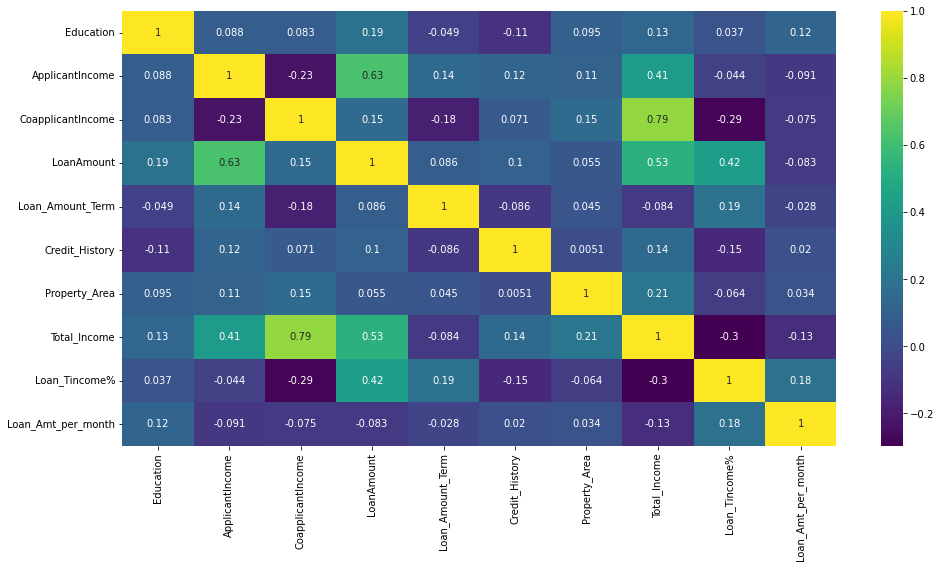

In [273]:
# Checking correlation of test data

plt.figure(figsize = (16,8))
correlation_test = loan_test_final.corr().round(4)
sns.heatmap(correlation_test, annot = True, cmap = "viridis")
plt.show()

In [274]:
# Dropping Total Income attribute as it is slightly highly corelated with coapplicant income

loan_test_final = loan_test_final.drop(columns="Total_Income")

In [275]:
# Final Overview of dataset

loan_test_final.head()

,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Tincome%,Loan_Amt_per_month
0,1,562500,0,110000,360,1.0,1,19.56,694.44
1,1,1277325,320400,200000,360,1.0,0,12.52,711.11
2,1,1788300,1612350,960000,360,1.0,0,28.23,366.67
3,1,1053000,469575,0,360,1.0,1,0.00,666.67
4,1,3937500,0,800000,360,1.0,0,20.32,783.33


## Data Scaling

In [276]:
# Fitting and transorming training dataset

loan_test_scaled = std.fit_transform(loan_test_final)

## Model Prediction

### Random Forest Classifier

In [277]:
# Model Prediction

random_forest_predicted = model2_rfh.predict(loan_test_scaled)

In [278]:
random_forest_predicted

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0], dtype=int64)

### KNN Classifier

In [279]:
# Model Prediction'

knn_predicted = model3_knnh.predict(loan_test_scaled)

In [280]:
knn_predicted

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0], dtype=int64)

### Gradient Boost Classifier

In [281]:
# Model Prediction

gradient_boost_predicted = model5_gbh.predict(loan_test_scaled)

In [282]:
gradient_boost_predicted 

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0], dtype=int64)

### Adaboost Classifier

In [283]:
# Model Prediction

adaboost_predicted = model4_abh.predict(loan_test_scaled)

In [284]:
adaboost_predicted

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0], dtype=int64)

In [285]:
loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%,Loan_Amt_per_month
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban,562500,19.56,694.44
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural,1597725,12.52,711.11
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural,3400650,28.23,366.67
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban,1522575,0.00,666.67
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural,3937500,20.32,783.33


In [286]:
# Updating the test dataset with predicted values

loan_test["Random_Forest_Predicted"] = pd.DataFrame(random_forest_predicted)
loan_test["KNN_Predicted"] = pd.DataFrame(knn_predicted)
loan_test["Gradient_Boost_Predicted"] = pd.DataFrame(gradient_boost_predicted)
loan_test["Adaboost_Predicted"] = pd.DataFrame(adaboost_predicted)

In [287]:
# Final Overview of dataset

loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Tincome%,Loan_Amt_per_month,Random_Forest_Predicted,KNN_Predicted,Gradient_Boost_Predicted,Adaboost_Predicted
0,788264,Male,No,0,Graduate,No,562500,0,110000,360,1.0,Semiurban,562500,19.56,694.44,0,1,1,1
1,431937,Male,Yes,3+,Graduate,Yes,1277325,320400,200000,360,1.0,Rural,1597725,12.52,711.11,1,0,0,1
2,425437,Male,Yes,2,Graduate,Yes,1788300,1612350,960000,360,1.0,Rural,3400650,28.23,366.67,1,1,1,1
3,938101,Male,No,0,Graduate,No,1053000,469575,0,360,1.0,Semiurban,1522575,0.00,666.67,1,1,1,1
4,180559,Male,Yes,2,Graduate,Yes,3937500,0,800000,360,1.0,Rural,3937500,20.32,783.33,1,1,1,1


In [288]:
# Exporting the final dataset with predictions to csv

loan_test.to_csv("Loan Test Data Predicted.csv", index = False)